# **Import Libraries**

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
plt.style.use('fivethirtyeight')
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

print('='*100)
print('Ready To Launch !!!!')
print('='*100)

/kaggle/input/taiwan-capitalization-weighted-stock-index/GDP Taiwan 2001 - 2020.csv
/kaggle/input/taiwan-capitalization-weighted-stock-index/CPI Taiwan 2001 - 2020.csv
/kaggle/input/taiwan-capitalization-weighted-stock-index/TWII.csv
/kaggle/input/taiwan-capitalization-weighted-stock-index/Taiwan Capitalization Weighted Stock Index 2009 - 2021.xls
Ready To Launch !!!!


# **Load Data**

In [4]:
# Load data
df = pd.read_csv('../input/taiwan-capitalization-weighted-stock-index/TWII.csv')
df

Date          Open          High           Low         Close     Adj Close     Volume
0     2000-01-04   8644.910156   8803.610352   8642.500000   8756.549805   8756.517578        0.0
1     2000-01-05   8690.599609   8867.679688   8668.019531   8849.870117   8849.837891        0.0
2     2000-01-06   8900.559570   9023.990234   8833.910156   8922.030273   8921.997070        0.0
3     2000-01-07   8853.429688   8940.769531   8739.429688   8849.870117   8849.837891        0.0
4     2000-01-10   8941.929688   9126.019531   8891.790039   9102.599609   9102.565430        0.0
...          ...           ...           ...           ...           ...           ...        ...
5414  2021-08-23  16459.130859  16785.289063  16459.130859  16741.839844  16741.839844  4379900.0
5415  2021-08-24  16830.630859  16904.300781  16779.900391  16818.730469  16818.730469  5515800.0
5416  2021-08-25  16821.080078  17045.859375  16821.080078  17045.859375  17045.859375  4501500.0
5417  2021-08-26  17177.390625  17201.419922  16984.689453  17066.960938  17066.960938  4595100.0
5418  2021-08-27  17061.099609  17229.890625  17000.259766  17209.929688  17209.929688  4252800.0

[5419 rows x 7 columns]

# **Checking Data**

In [3]:
# Getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5419 entries, 0 to 5418
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5419 non-null   object 
 1   Open       5322 non-null   float64
 2   High       5322 non-null   float64
 3   Low        5322 non-null   float64
 4   Close      5322 non-null   float64
 5   Adj Close  5322 non-null   float64
 6   Volume     5322 non-null   float64
dtypes: float64(6), object(1)
memory usage: 296.5+ KB


In [4]:
# Checking the null value
df.isna().mean().to_frame()

0
Date       0.0000
Open       0.0179
High       0.0179
Low        0.0179
Close      0.0179
Adj Close  0.0179
Volume     0.0179

In [5]:
# Droping missing value
df = df.dropna()

In [6]:
# Checking missing value
df.isna().mean().to_frame()

0
Date       0.0
Open       0.0
High       0.0
Low        0.0
Close      0.0
Adj Close  0.0
Volume     0.0

In [7]:
# Check the data
df

Date          Open          High           Low         Close     Adj Close     Volume
0     2000-01-04   8644.910156   8803.610352   8642.500000   8756.549805   8756.517578        0.0
1     2000-01-05   8690.599609   8867.679688   8668.019531   8849.870117   8849.837891        0.0
2     2000-01-06   8900.559570   9023.990234   8833.910156   8922.030273   8921.997070        0.0
3     2000-01-07   8853.429688   8940.769531   8739.429688   8849.870117   8849.837891        0.0
4     2000-01-10   8941.929688   9126.019531   8891.790039   9102.599609   9102.565430        0.0
...          ...           ...           ...           ...           ...           ...        ...
5414  2021-08-23  16459.130859  16785.289063  16459.130859  16741.839844  16741.839844  4379900.0
5415  2021-08-24  16830.630859  16904.300781  16779.900391  16818.730469  16818.730469  5515800.0
5416  2021-08-25  16821.080078  17045.859375  16821.080078  17045.859375  17045.859375  4501500.0
5417  2021-08-26  17177.390625  17201.419922  16984.689453  17066.960938  17066.960938  4595100.0
5418  2021-08-27  17061.099609  17229.890625  17000.259766  17209.929688  17209.929688  4252800.0

[5322 rows x 7 columns]

In [6]:
# Convert Date Columns to Timestamp
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Check type
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# Set the Date column to index
df.set_index('Date',inplace=True)

# Checking the first 5 rows of data
df.head()

Open         High          Low        Close    Adj Close  Volume
Date                                                                               
2000-01-04  8644.910156  8803.610352  8642.500000  8756.549805  8756.517578     0.0
2000-01-05  8690.599609  8867.679688  8668.019531  8849.870117  8849.837891     0.0
2000-01-06  8900.559570  9023.990234  8833.910156  8922.030273  8921.997070     0.0
2000-01-07  8853.429688  8940.769531  8739.429688  8849.870117  8849.837891     0.0
2000-01-10  8941.929688  9126.019531  8891.790039  9102.599609  9102.565430     0.0

In [11]:
# Checking the last 5 rows of data
df.tail()

Open          High           Low         Close     Adj Close     Volume
Date                                                                                       
2021-08-23  16459.130859  16785.289063  16459.130859  16741.839844  16741.839844  4379900.0
2021-08-24  16830.630859  16904.300781  16779.900391  16818.730469  16818.730469  5515800.0
2021-08-25  16821.080078  17045.859375  16821.080078  17045.859375  17045.859375  4501500.0
2021-08-26  17177.390625  17201.419922  16984.689453  17066.960938  17066.960938  4595100.0
2021-08-27  17061.099609  17229.890625  17000.259766  17209.929688  17209.929688  4252800.0

# **Analysis on Open, High, Low, and Close from 2001 - Current Year**

In [9]:
# Accomodate data without Volume
data = df.drop('Volume',axis=1)

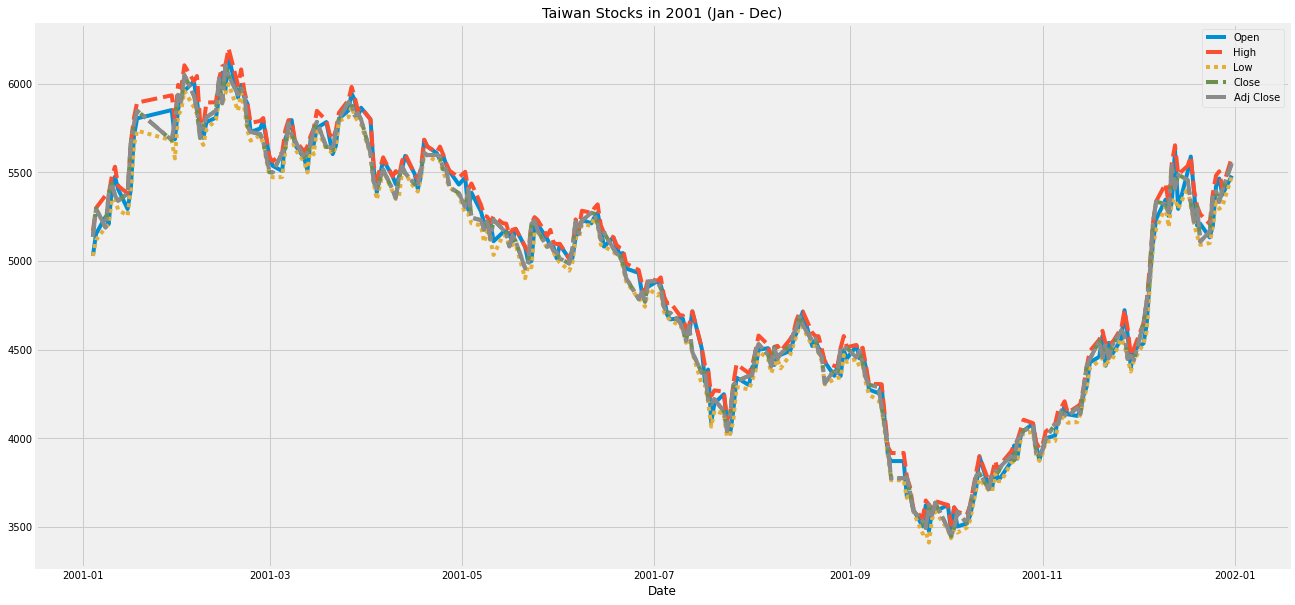

In [13]:
# Plotting Data
plt.figure(figsize=(20,10))
sns.lineplot(data=data.loc['2001-01-04':'2001-12-31'])
plt.title('Taiwan Stocks in 2001 (Jan - Dec)')
plt.show()

## **Conclusion**

There is a decrease in stock in the 4th to the 10th month of 2001

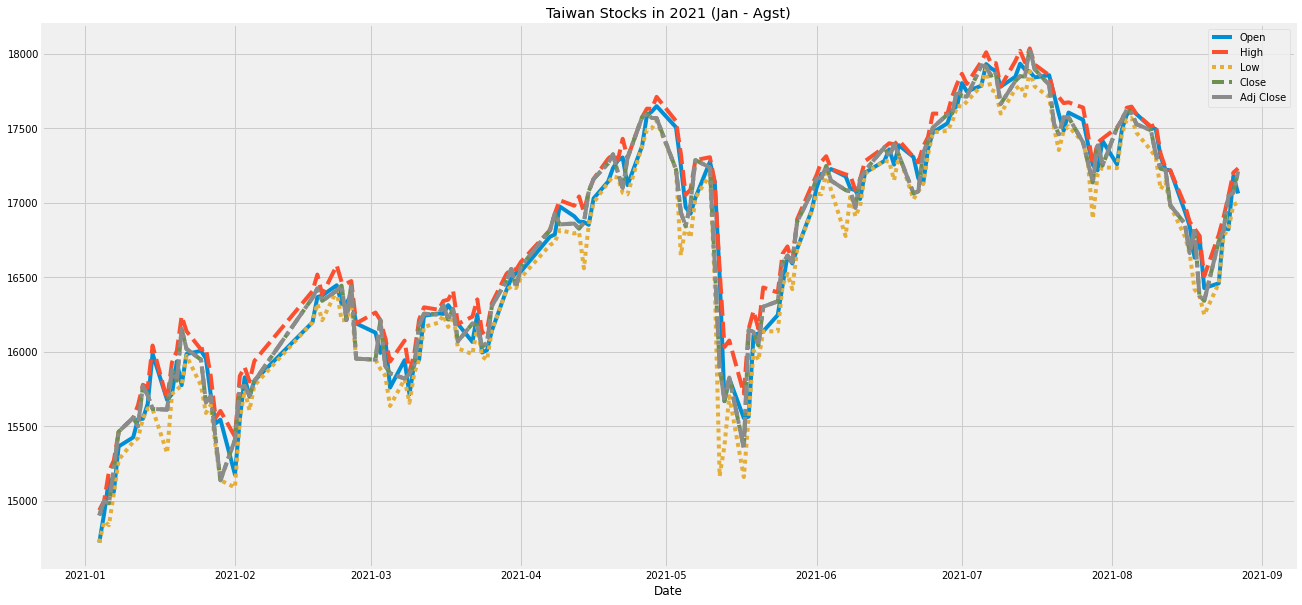

In [14]:
# Plotting Data
plt.figure(figsize=(20,10))
sns.lineplot(data=data.loc['2021-01-01':'2021-08-27'])
plt.title('Taiwan Stocks in 2021 (Jan - Agst)')
plt.show()

## **Conclusion**

Stock ups and downs are clearly visible here, where there is a good increase in months 01 to 05, and there is a very drastic decline in the middle of months 05 to 06.

# **Taiwan Stocks From 2002 - 2020**

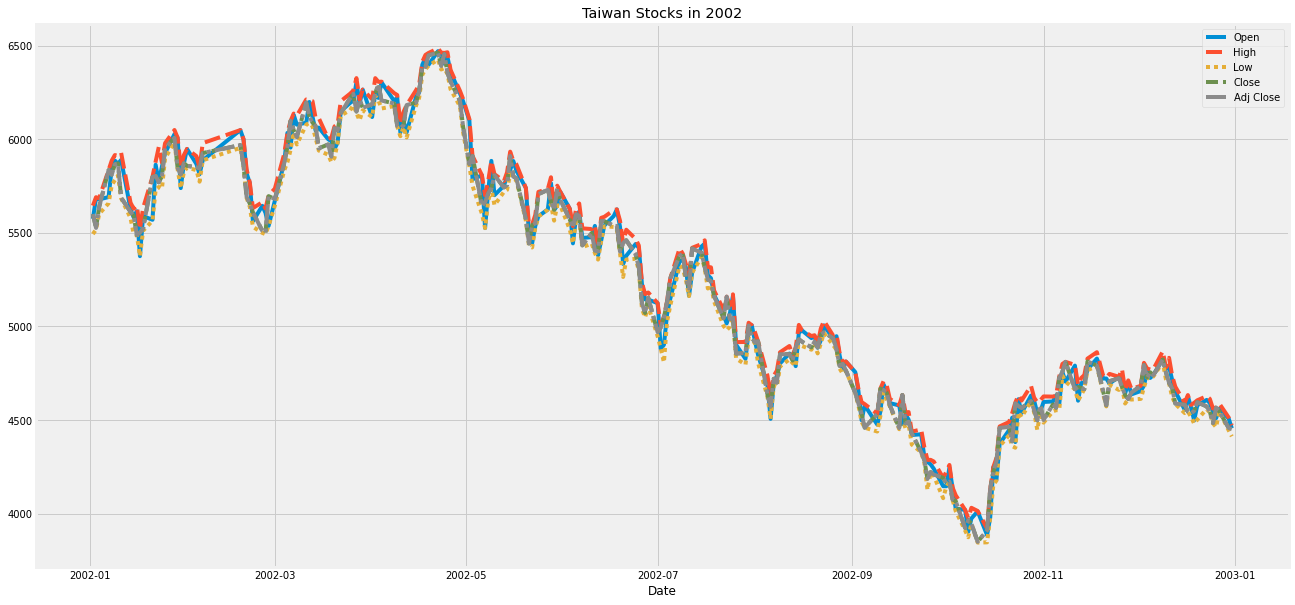

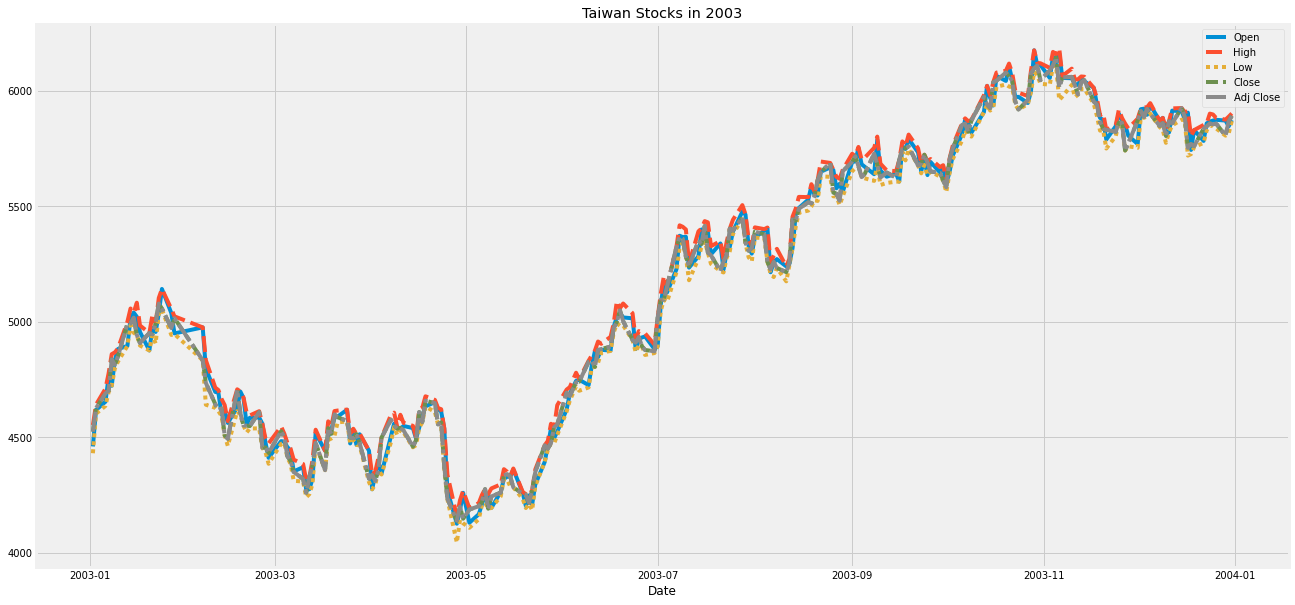

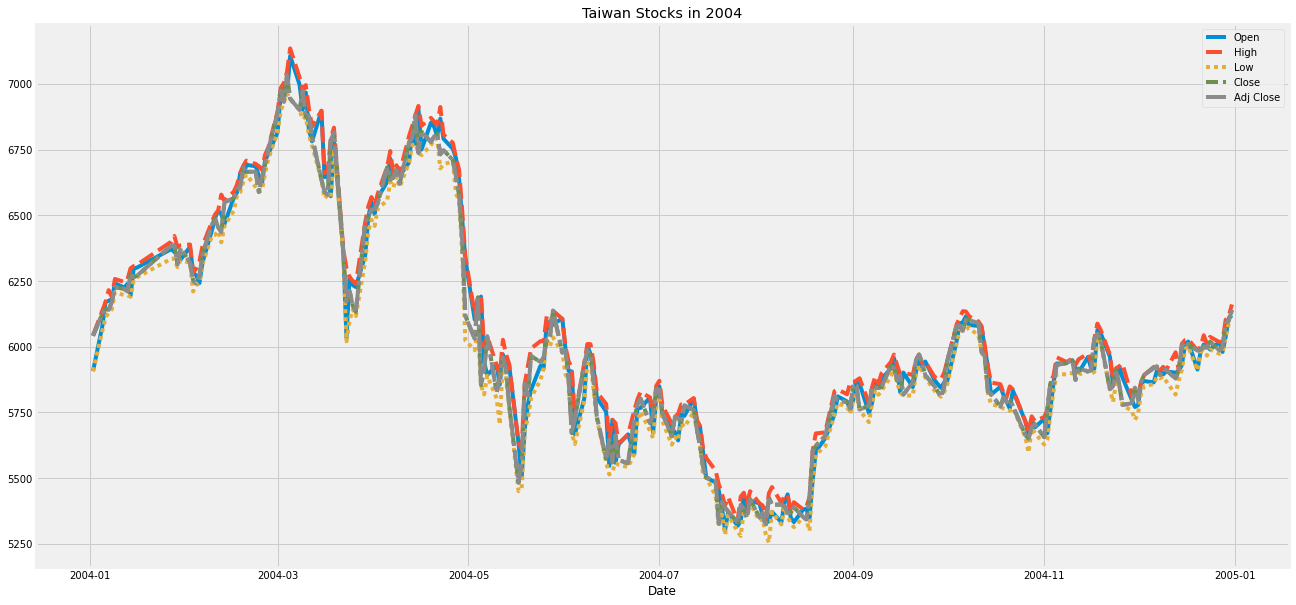

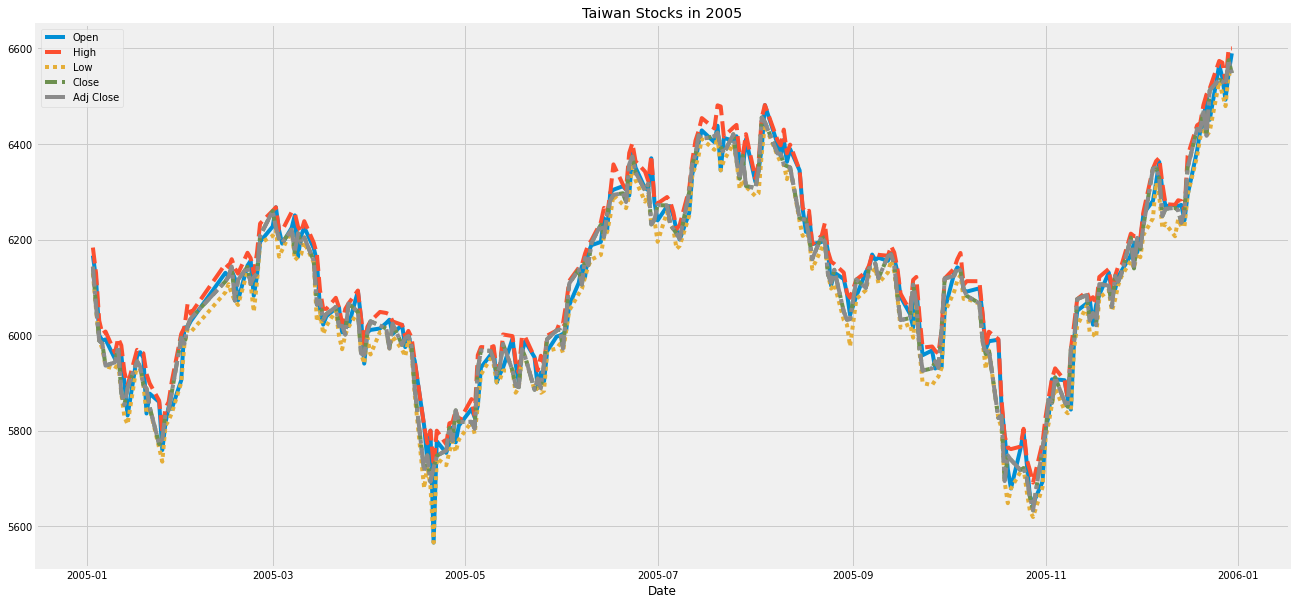

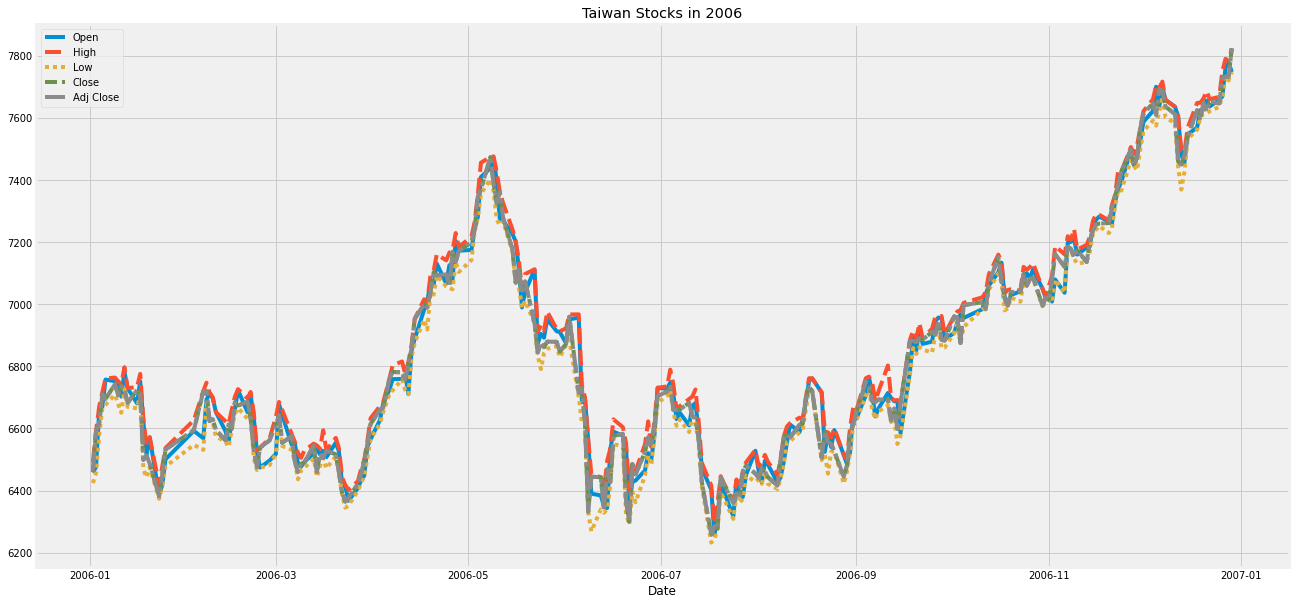

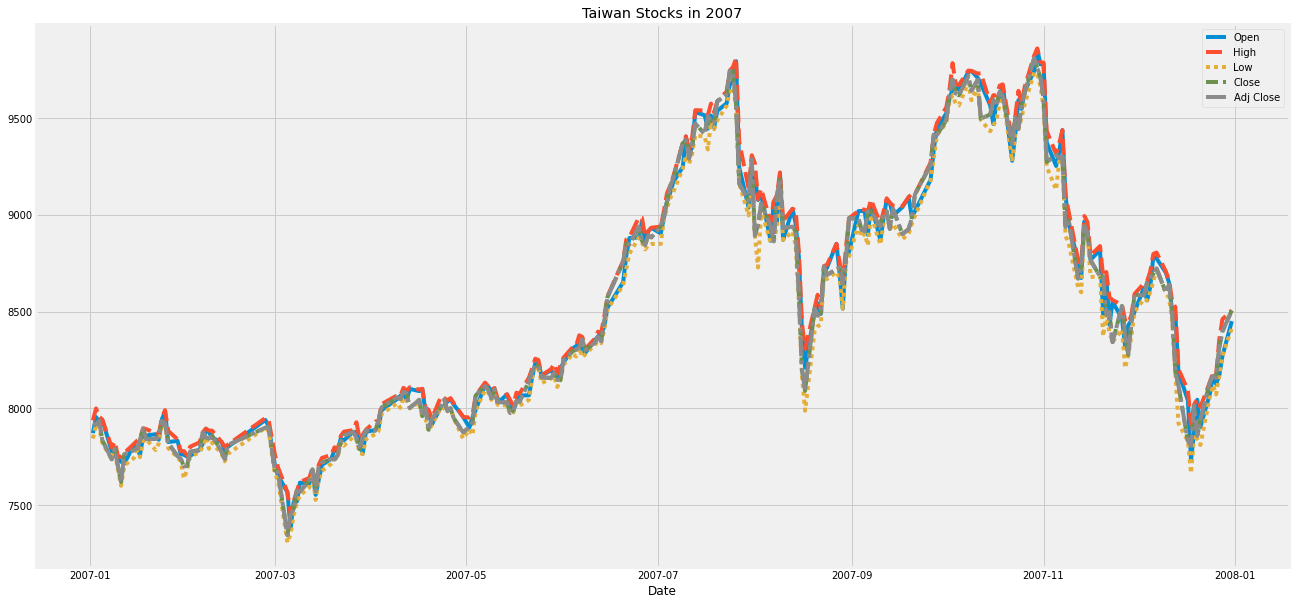

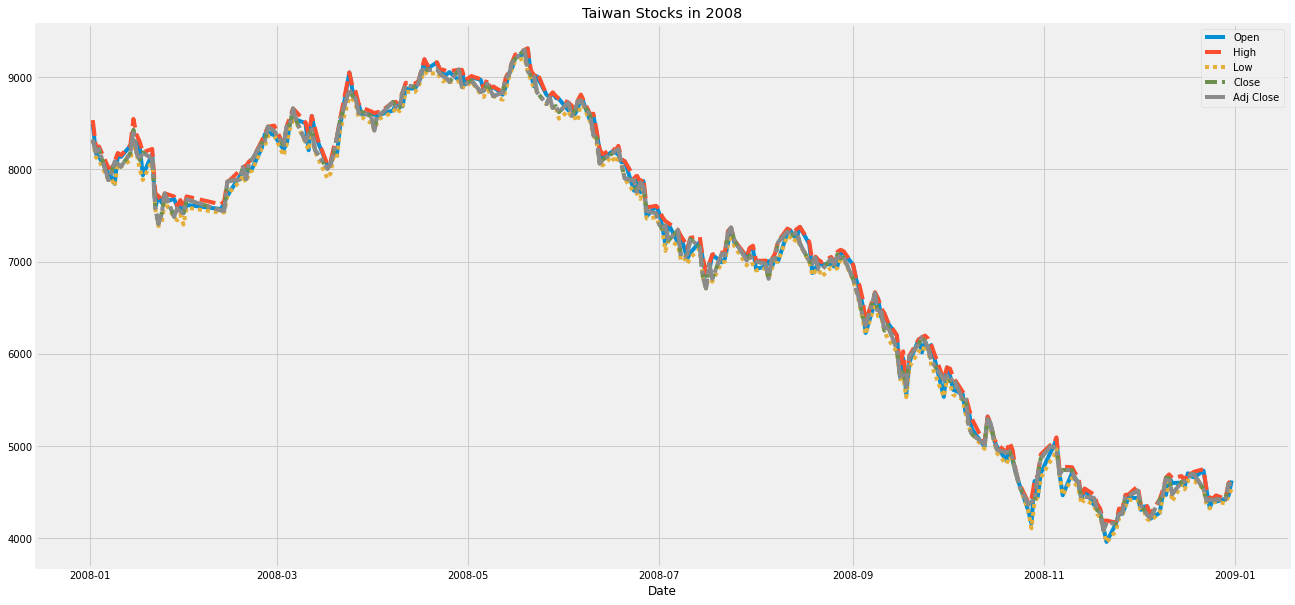

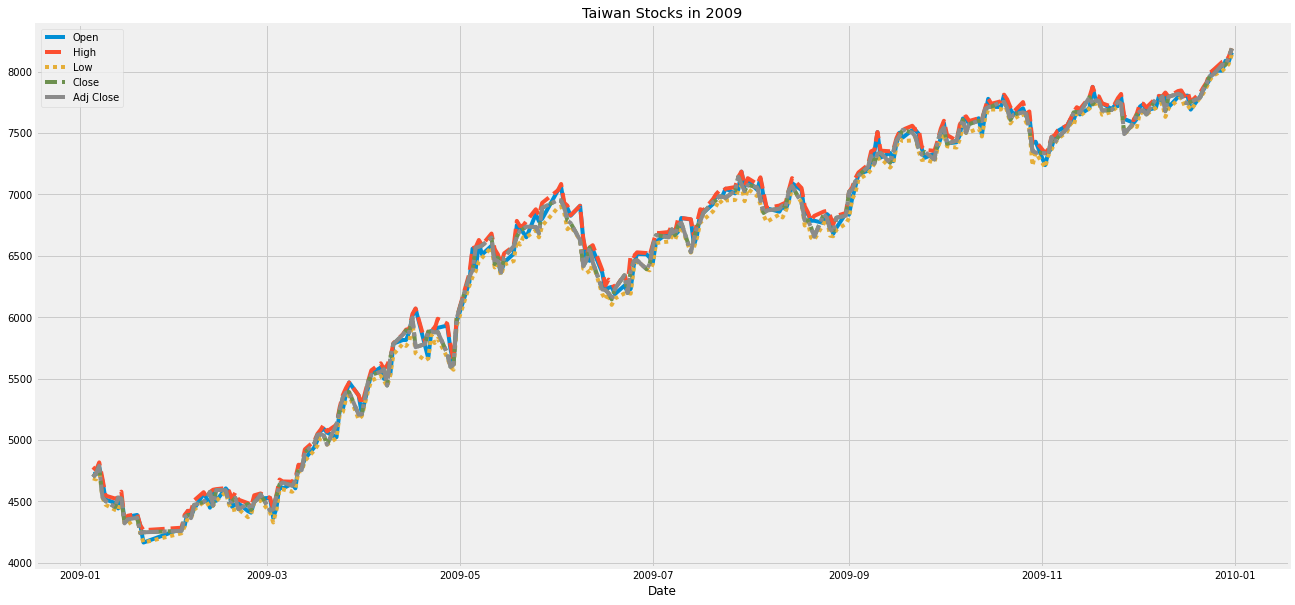

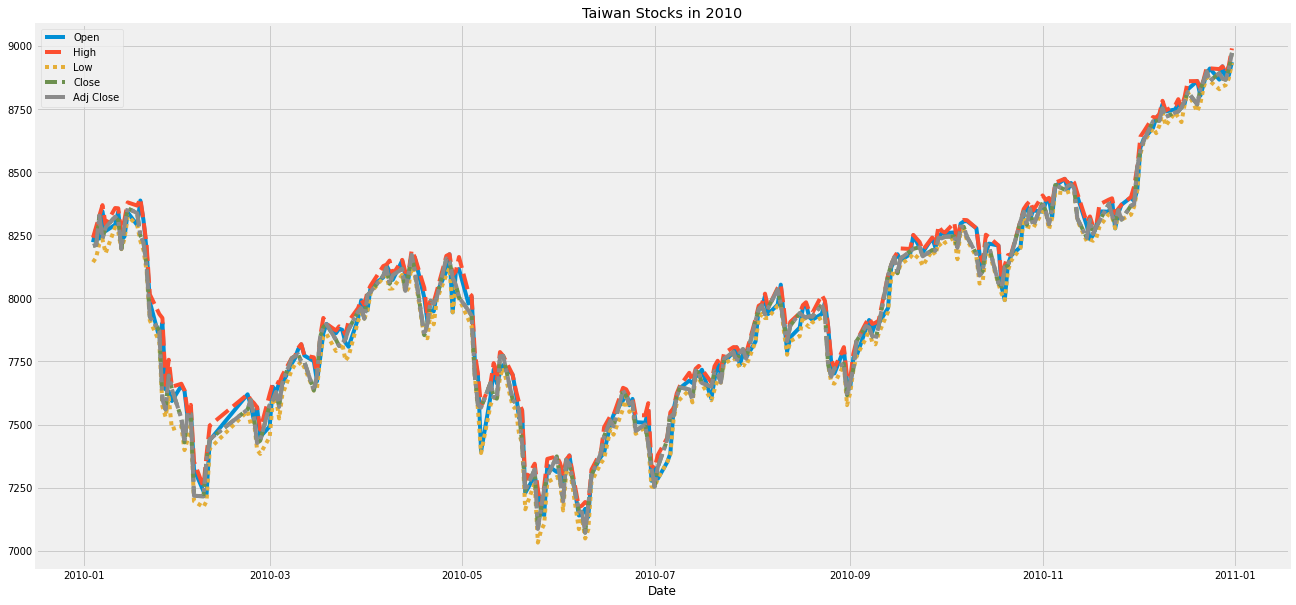

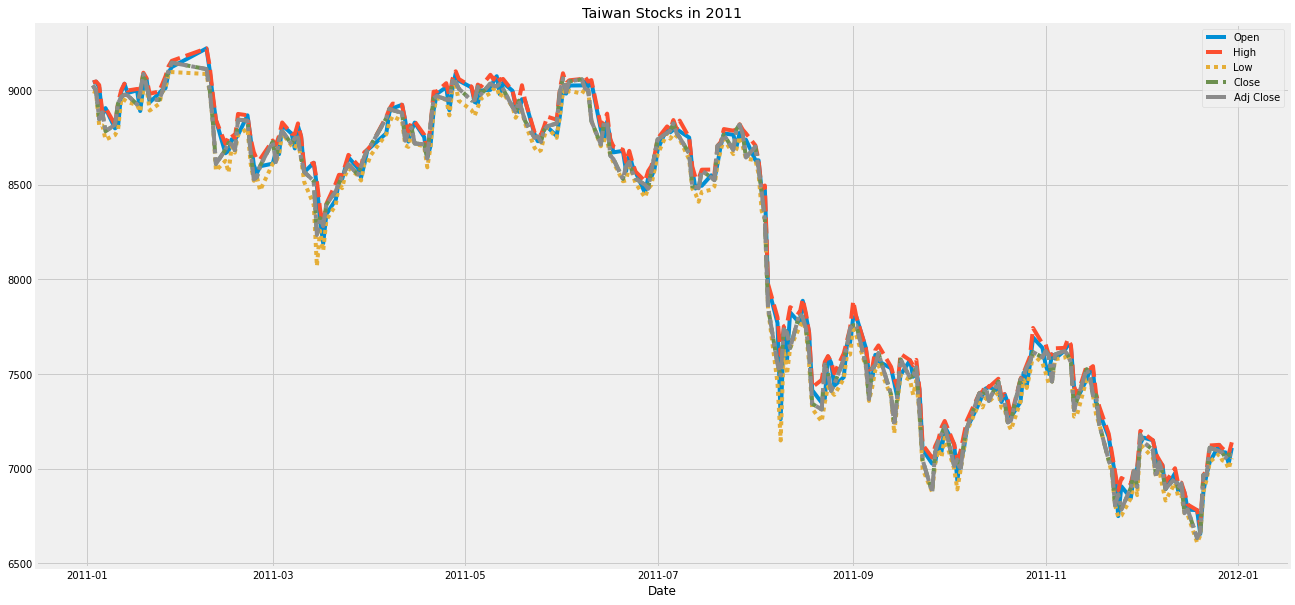

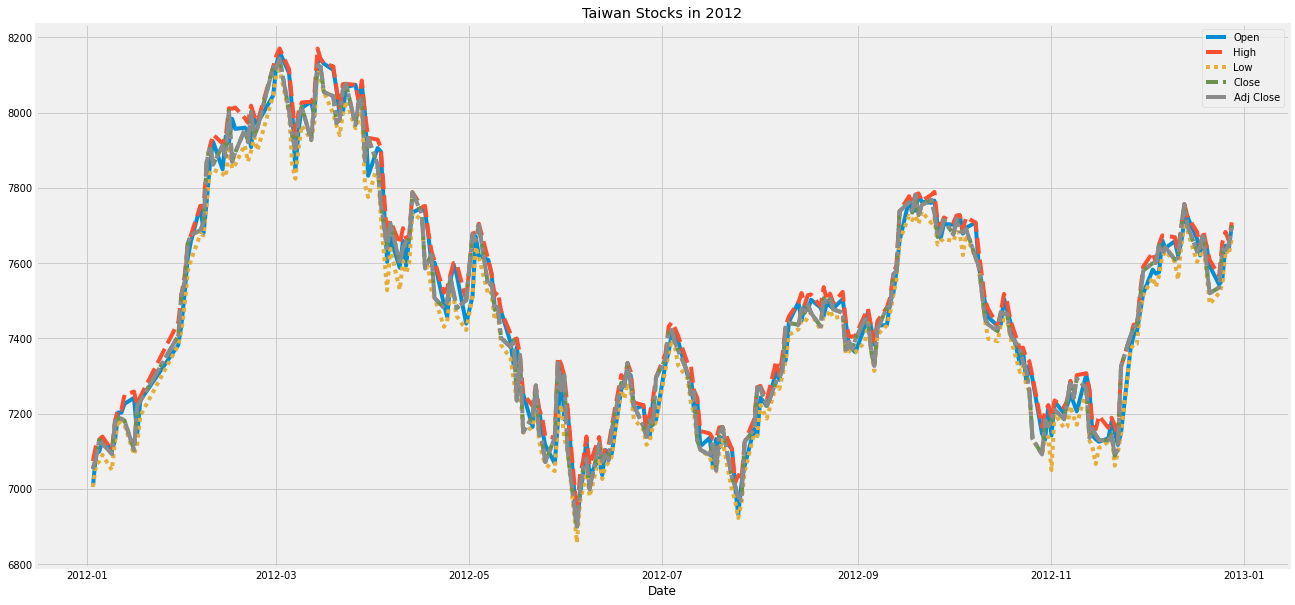

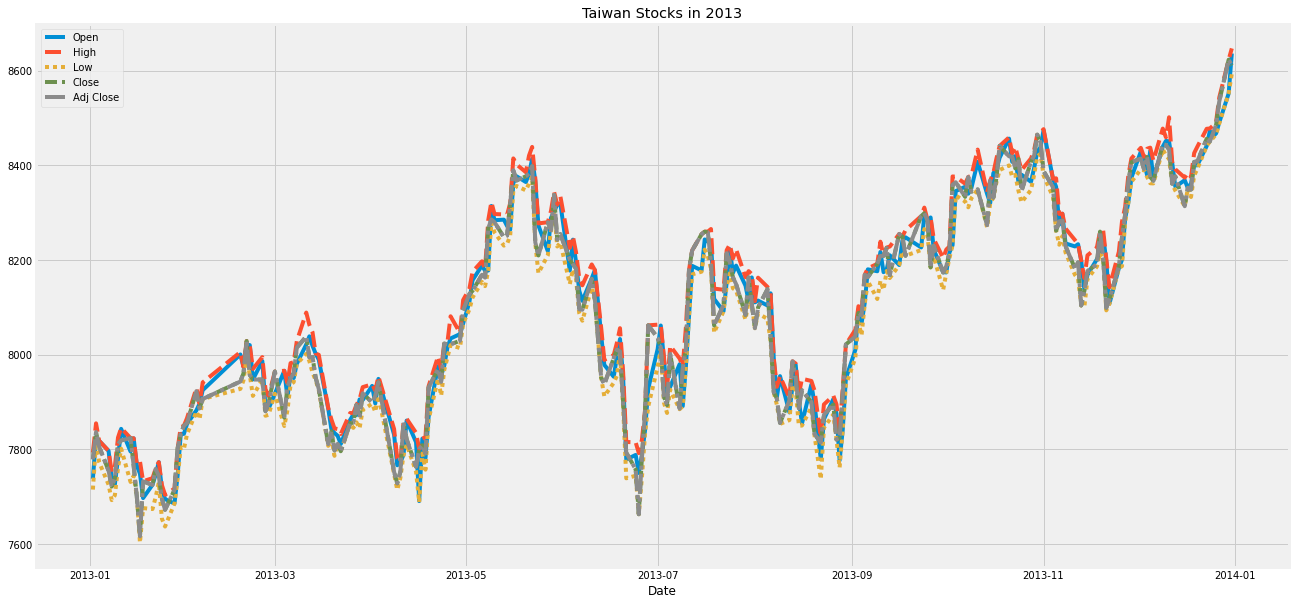

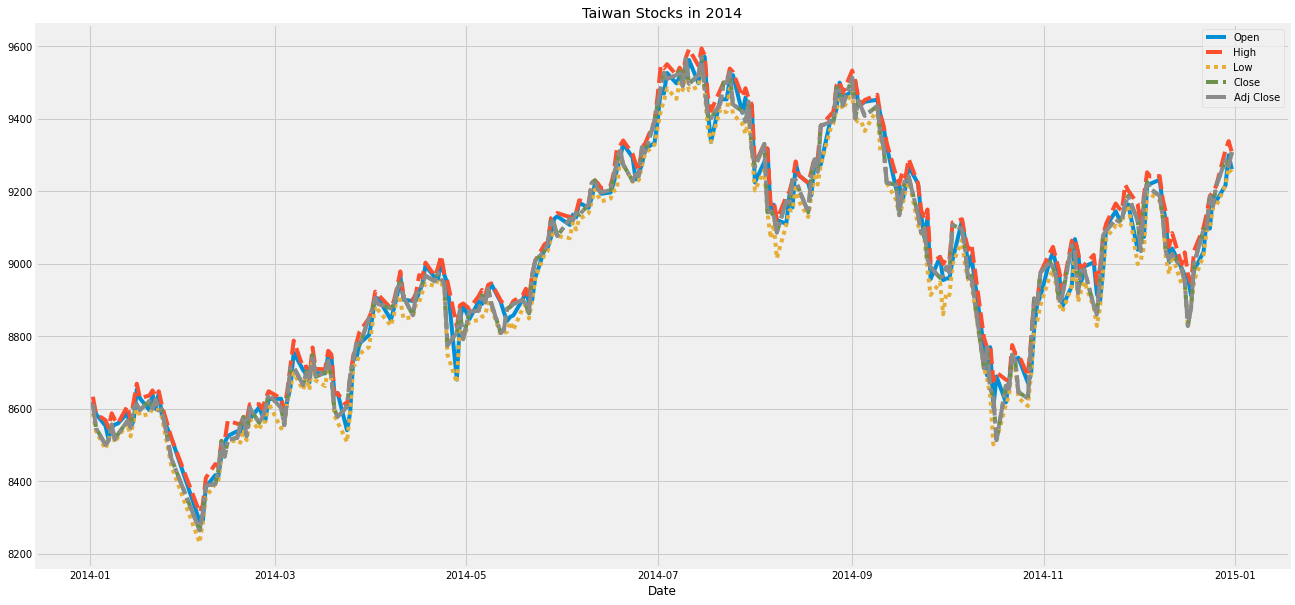

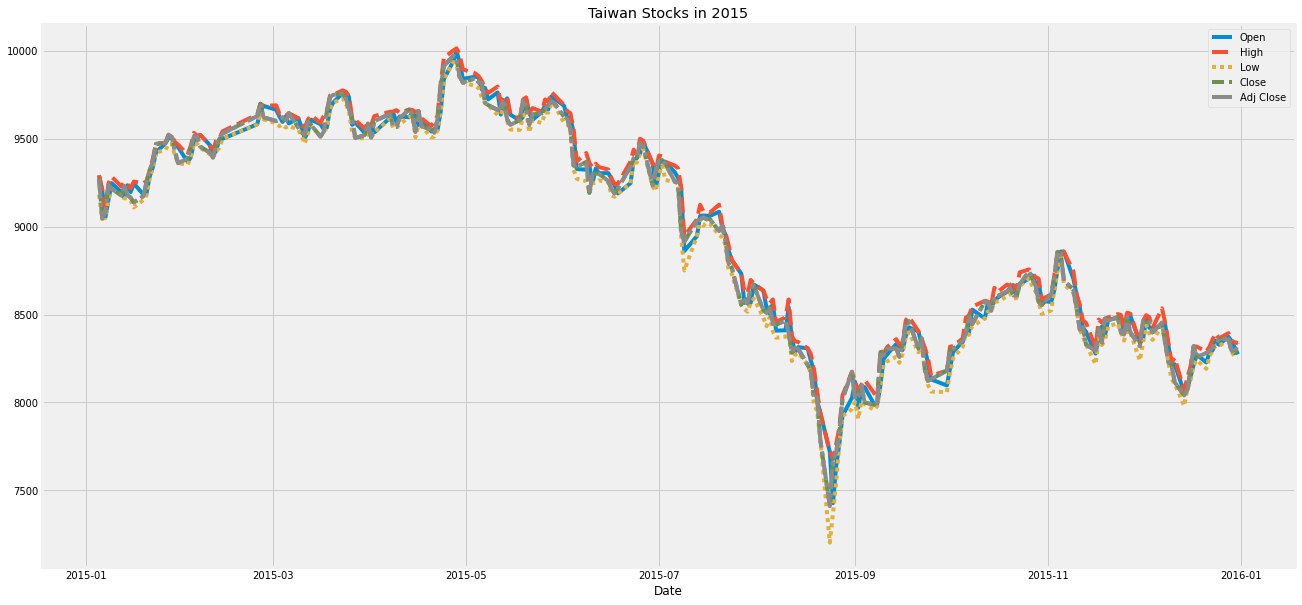

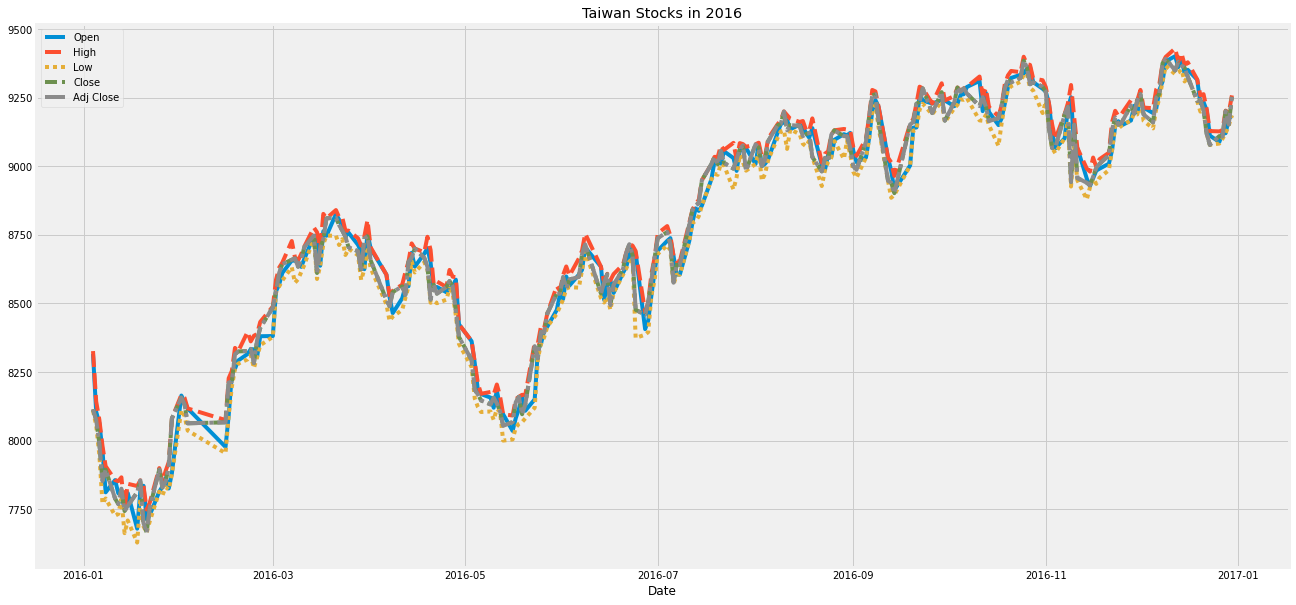

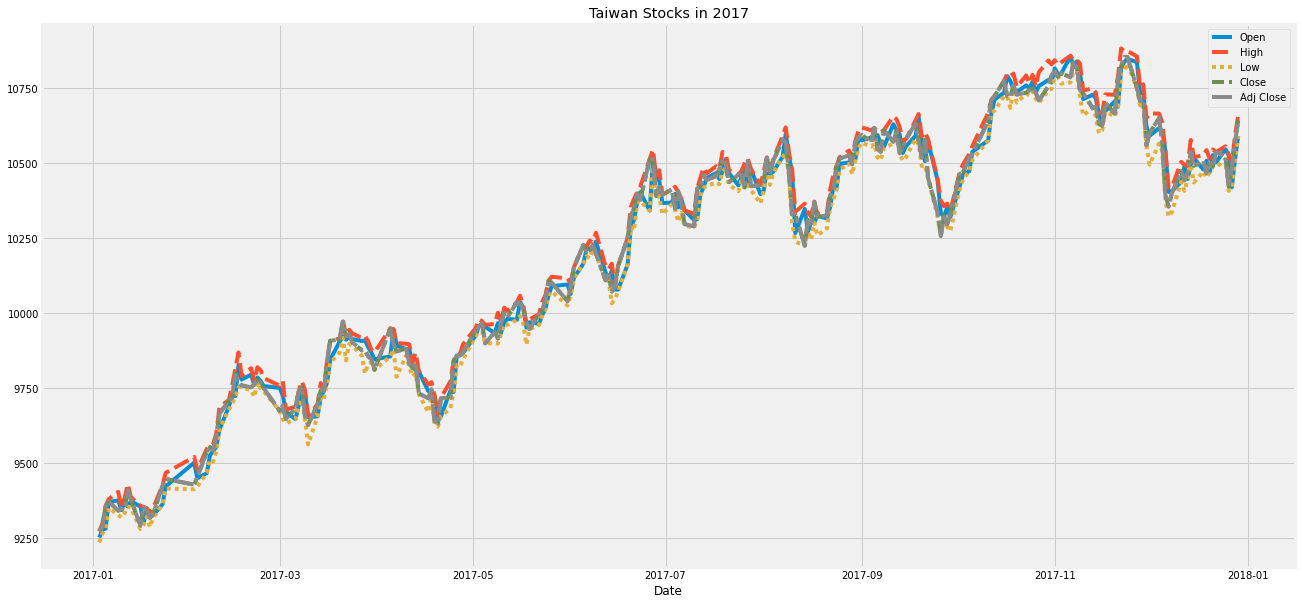

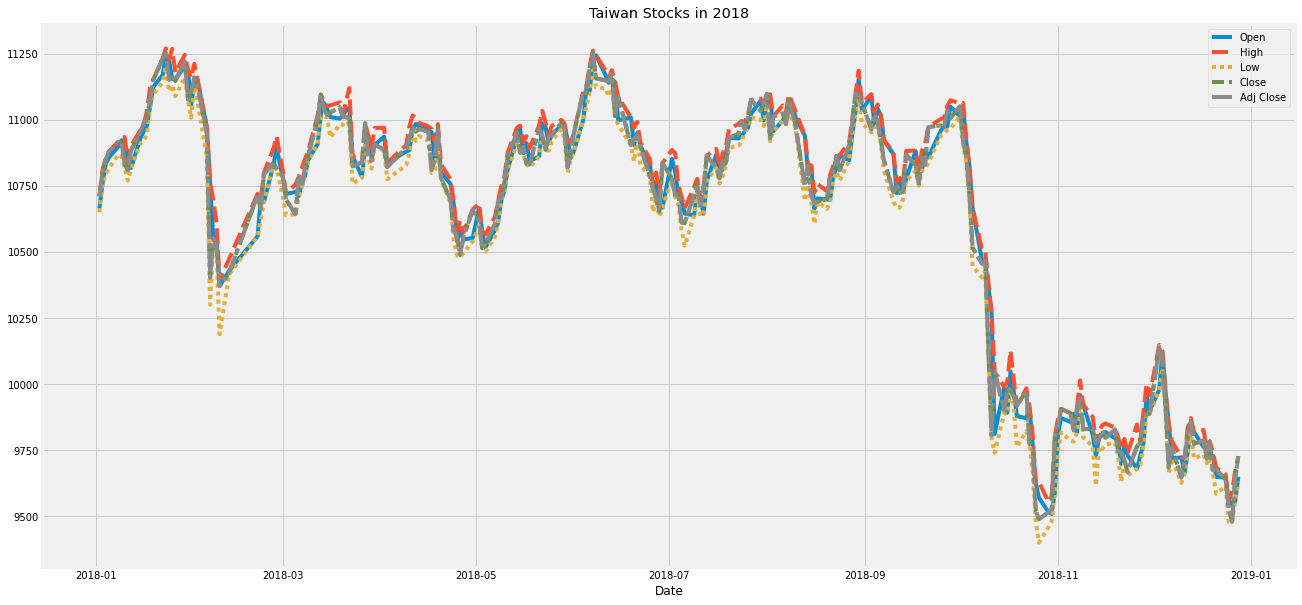

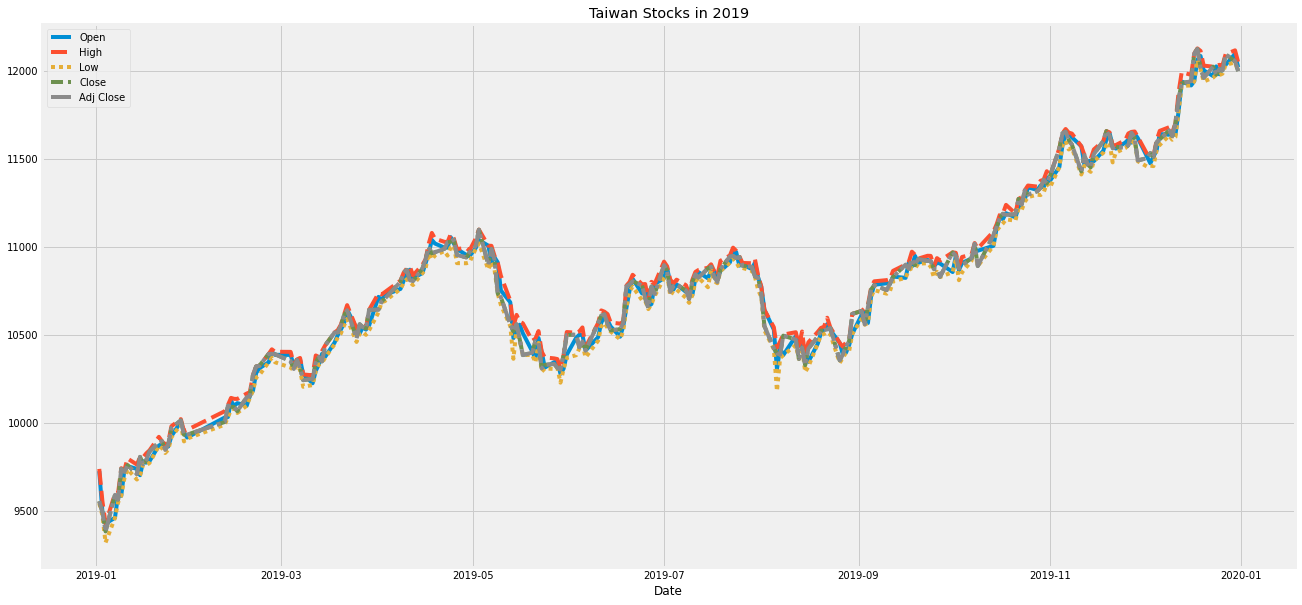

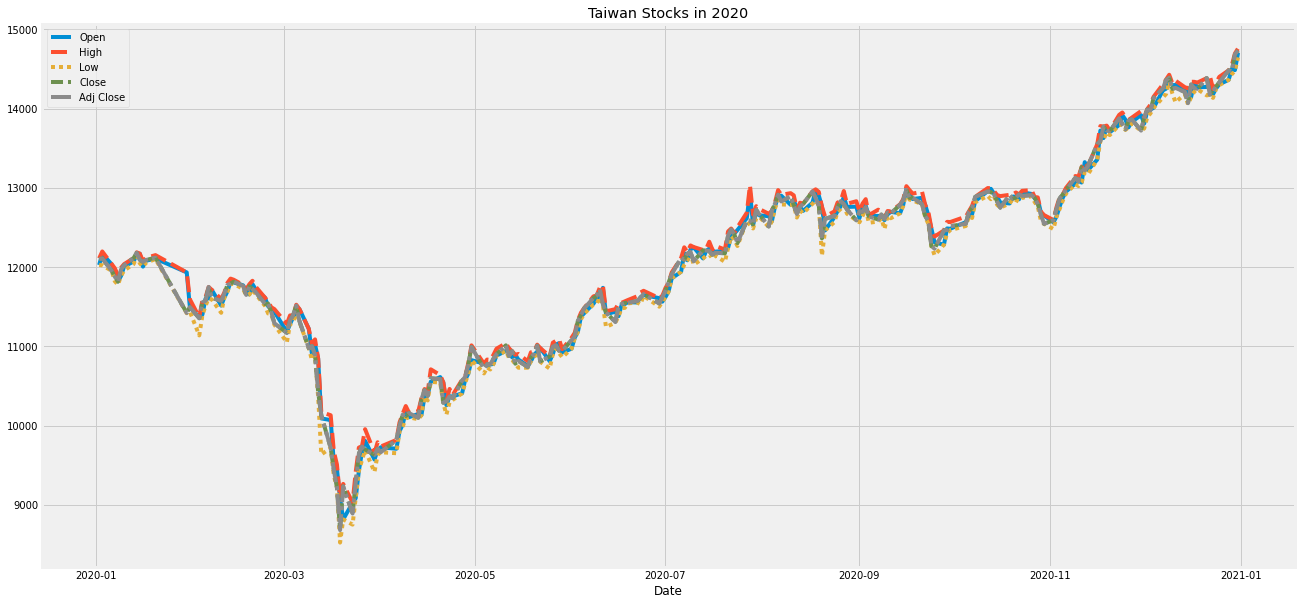

In [15]:
# Make a For Loop and Plot the Data
for year in range(2002,2020+1):
    plt.figure(figsize=(20,10))
    sns.lineplot(data=data.loc[f'{year}-01-01':f'{year}-12-31'])
    plt.title(f'Taiwan Stocks in {year}')
    plt.show()
    print('\n')

## **Conclusion**

From the visualization above, it can be concluded that the average increase in stock occurs at the end of the month every year in an average of 10-15 thousand stocks, and declines often occur in the middle of the month.

# **Volume Analysis From 2001 - Current Year**

In [16]:
# Accomodate Data Volume
volume = df['Volume']

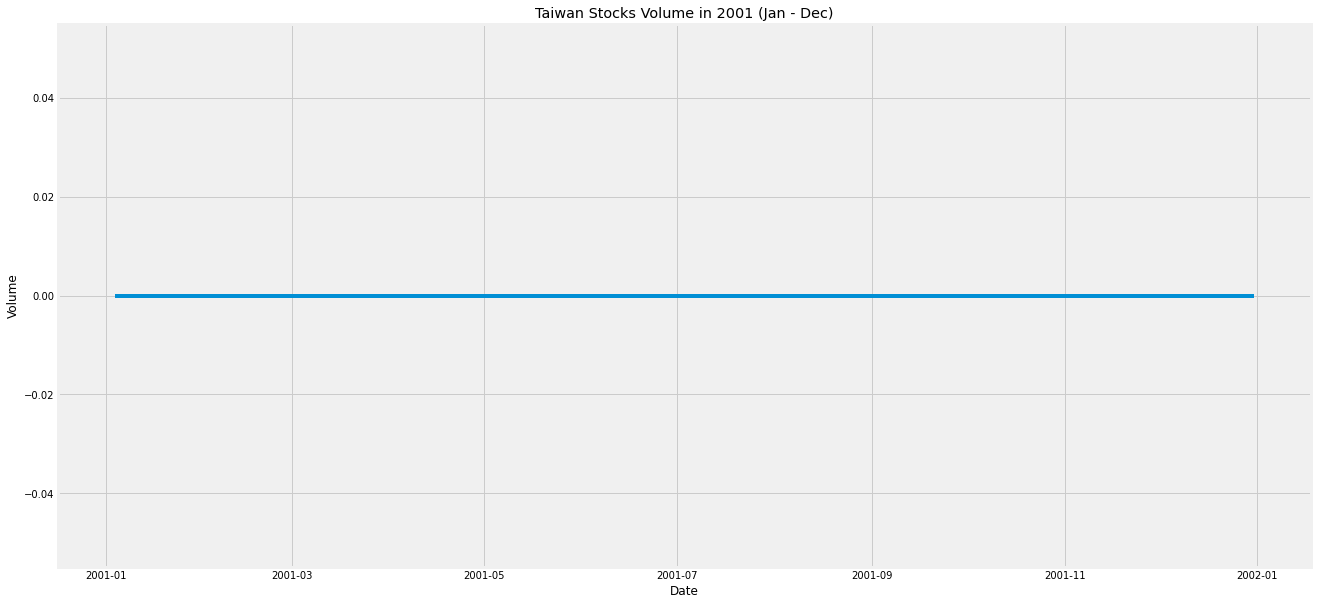

In [17]:
# Plotting Data
plt.figure(figsize=(20,10))
sns.lineplot(data=volume.loc['2001-01-04':'2001-12-31'])
plt.title('Taiwan Stocks Volume in 2001 (Jan - Dec)')
plt.show()

## **Conclusion**

From the visualization above, it can be concluded that the volume data is very constant and there is no increase or decrease.

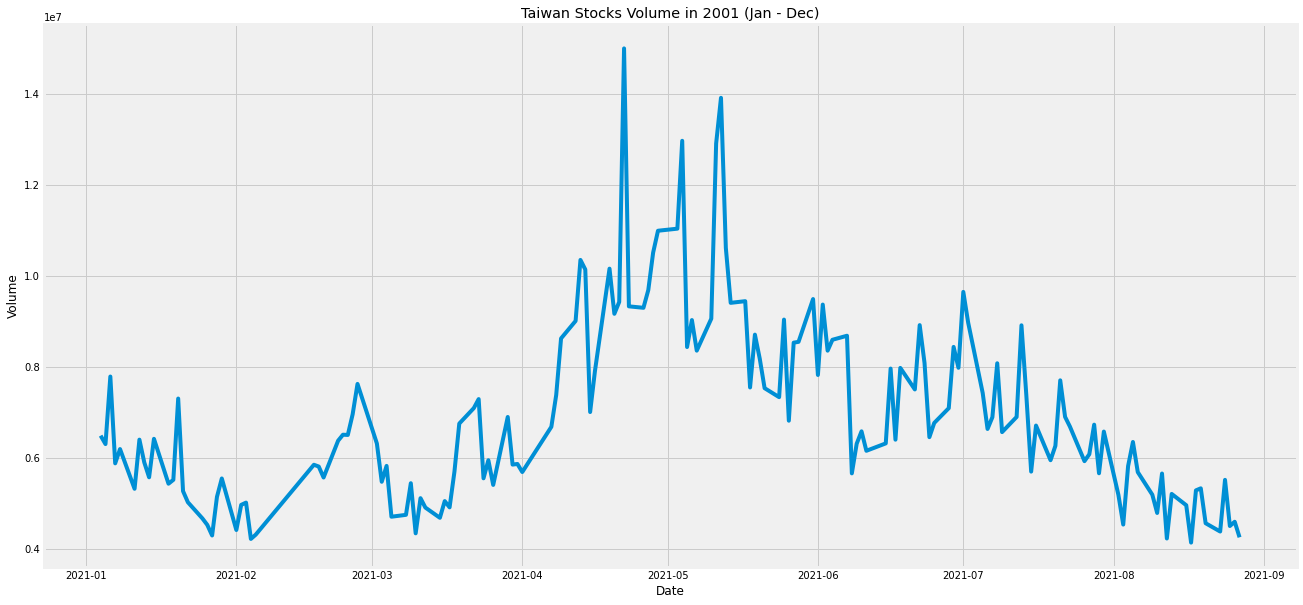

In [18]:
# Plotting Data
plt.figure(figsize=(20,10))
sns.lineplot(data=volume.loc['2021-01-01':'2021-08-28'])
plt.title('Taiwan Stocks Volume in 2001 (Jan - Dec)')
plt.show()

## **Conclusion**

From the visualization above, it can be concluded that the volume data decresing in the end of the month, and there is a very high increase in the middle of the 4th month

# **Taiwan Volume Stocks From 2002 - 2020**

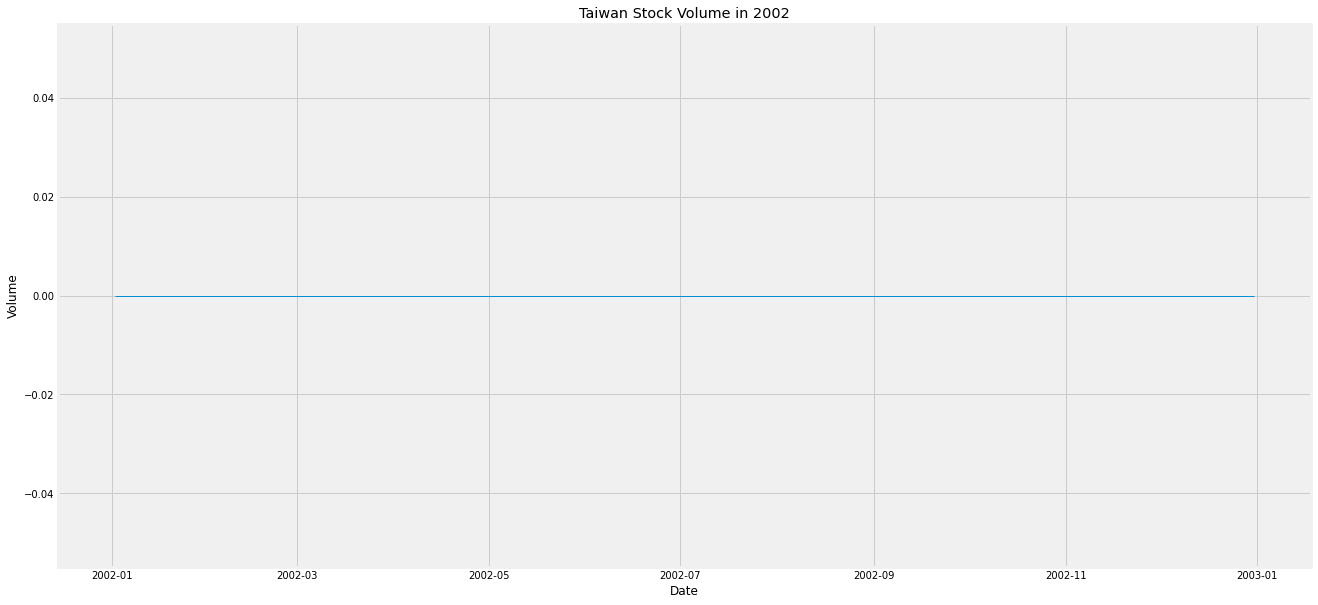

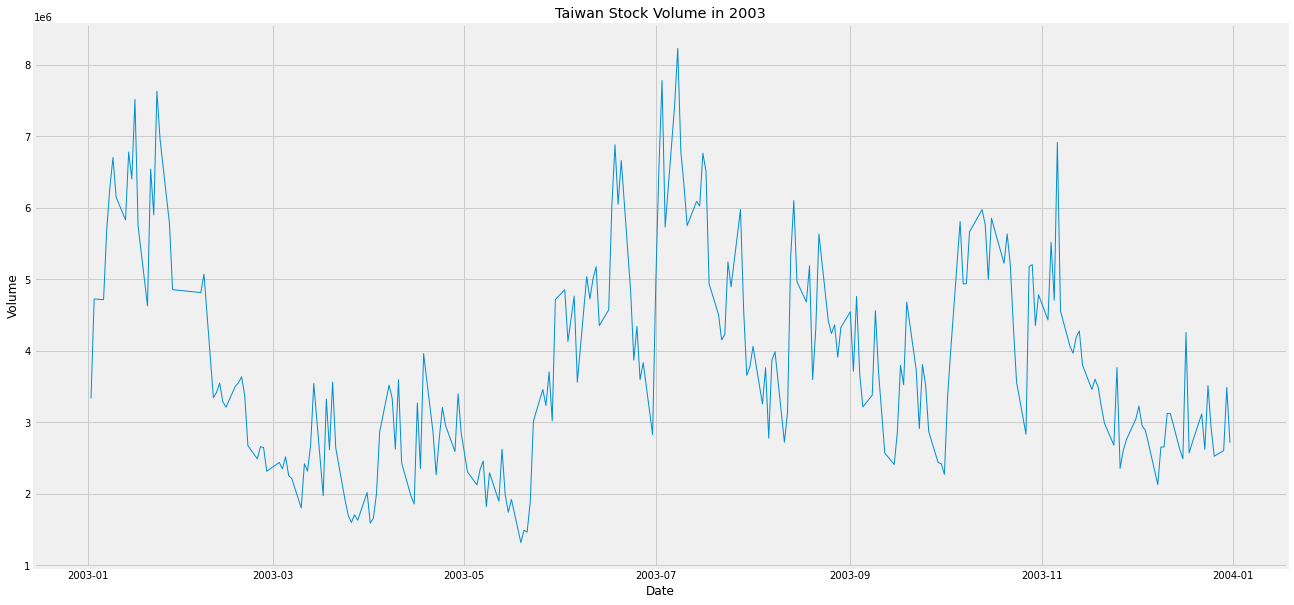

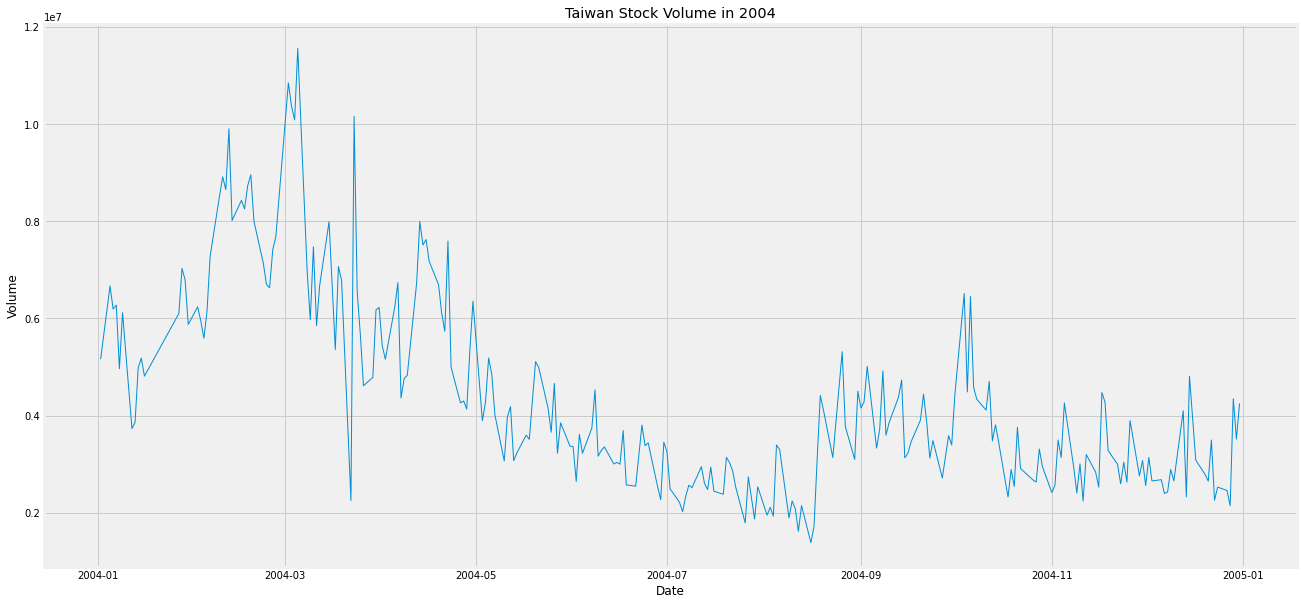

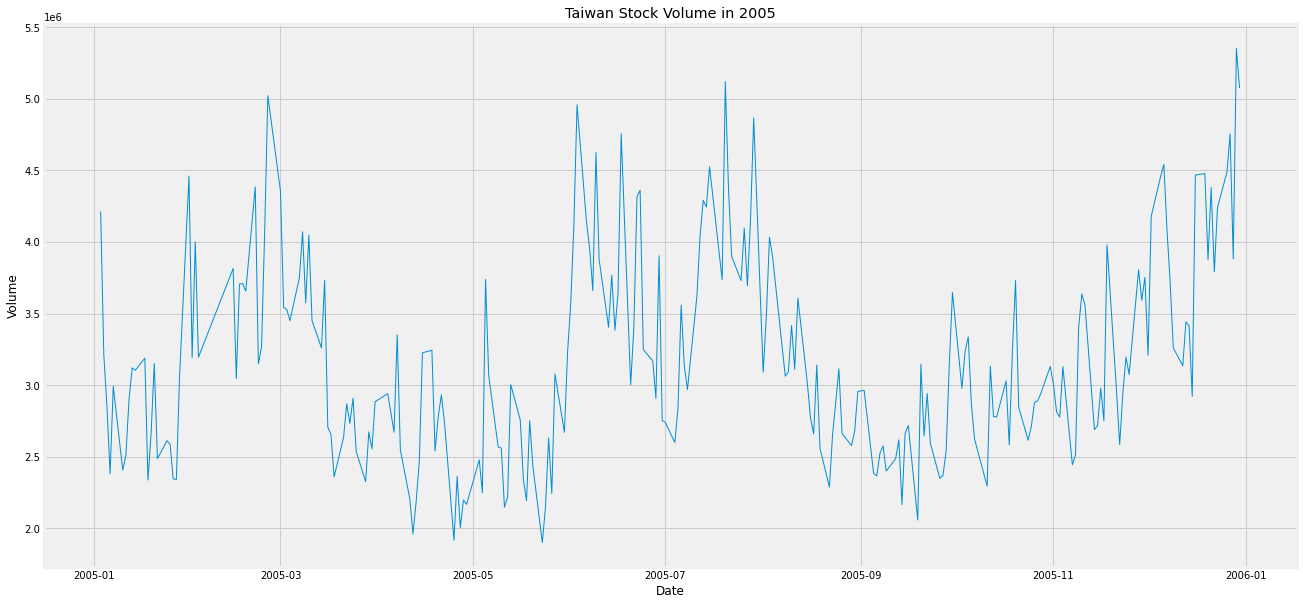

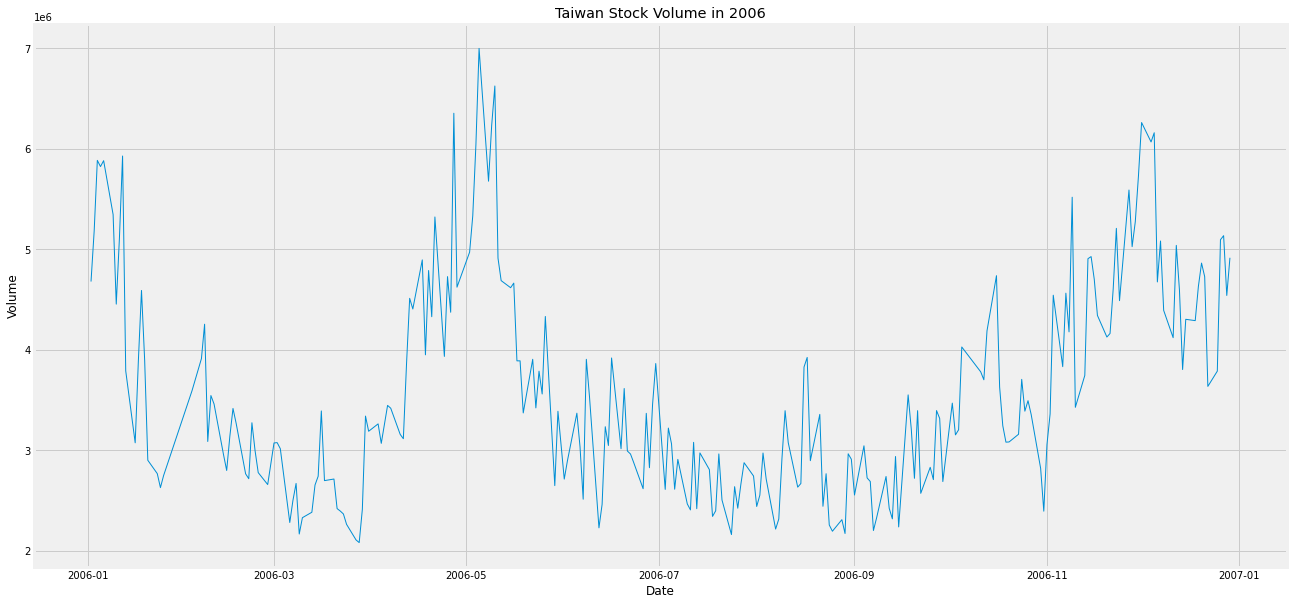

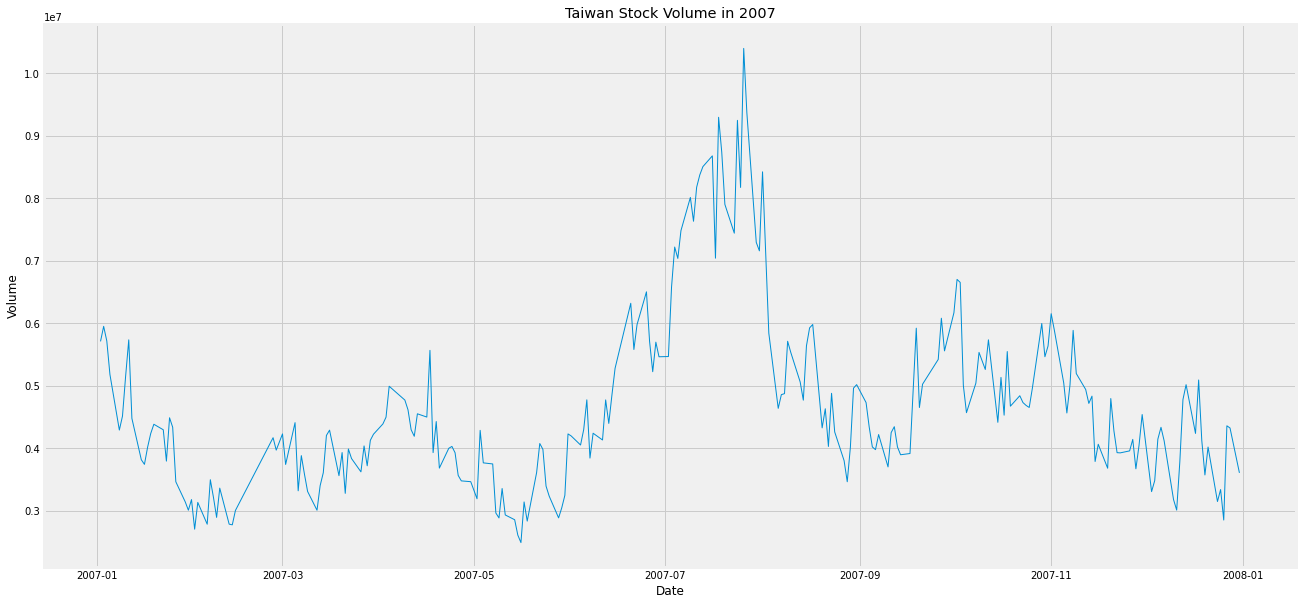

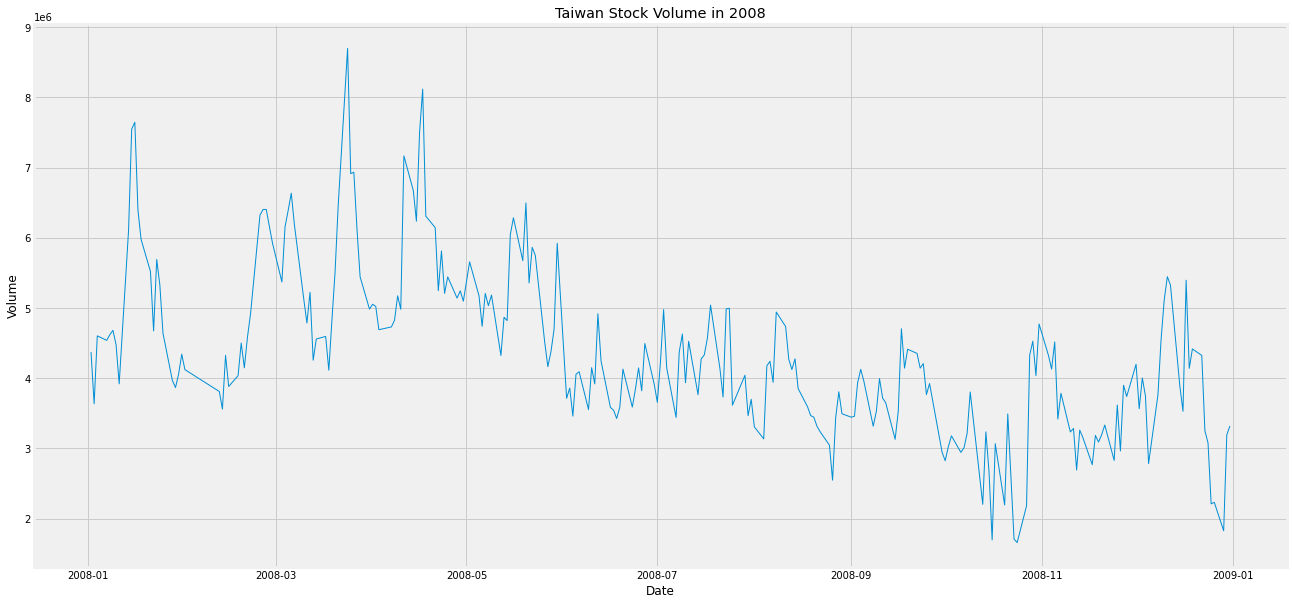

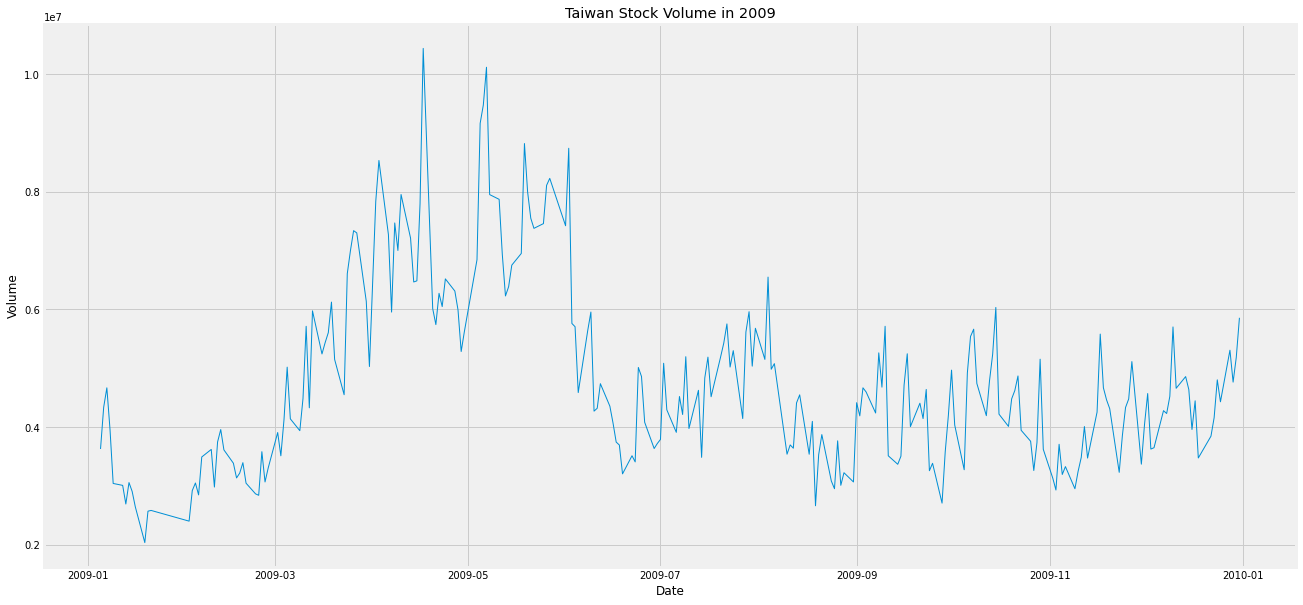

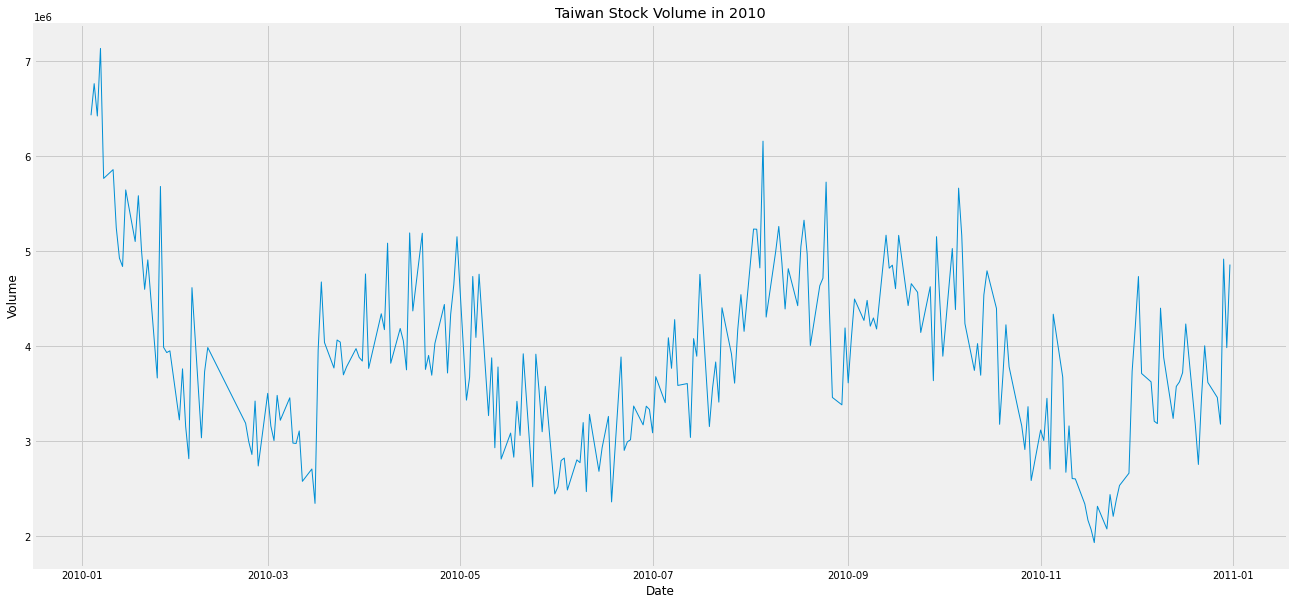

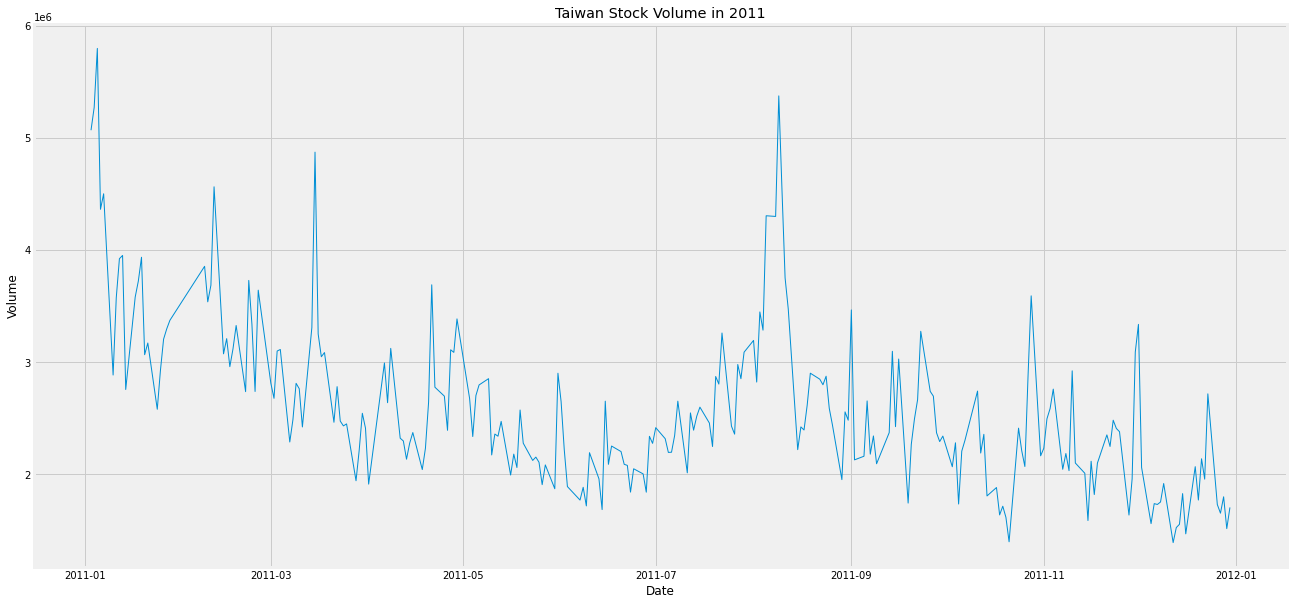

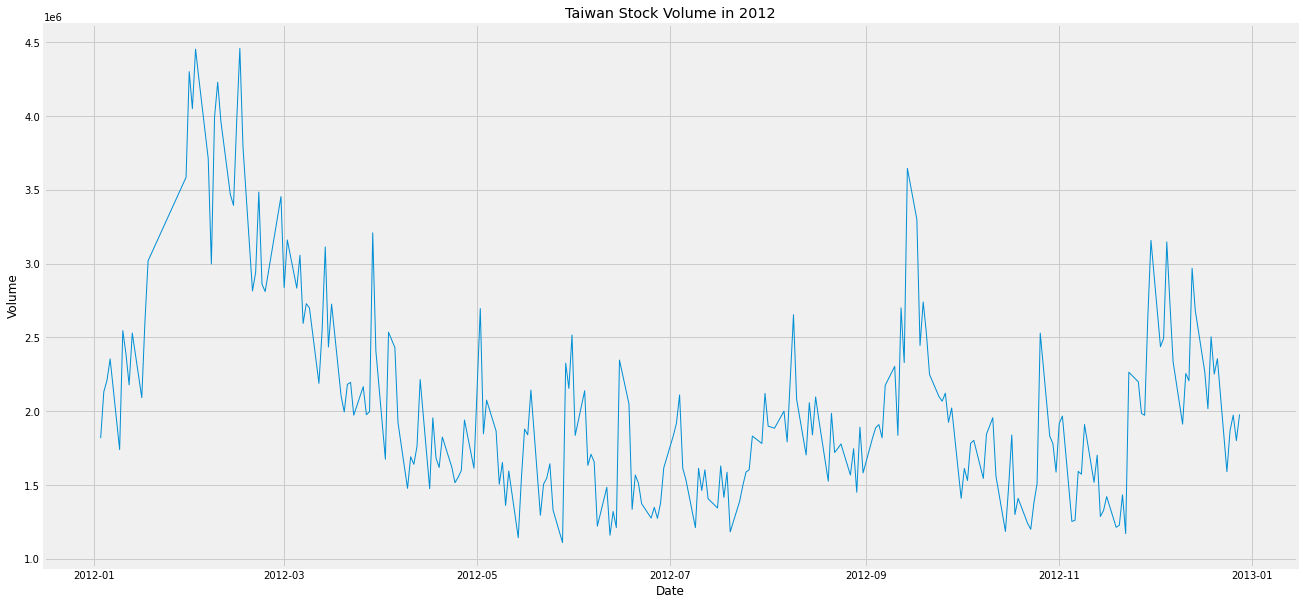

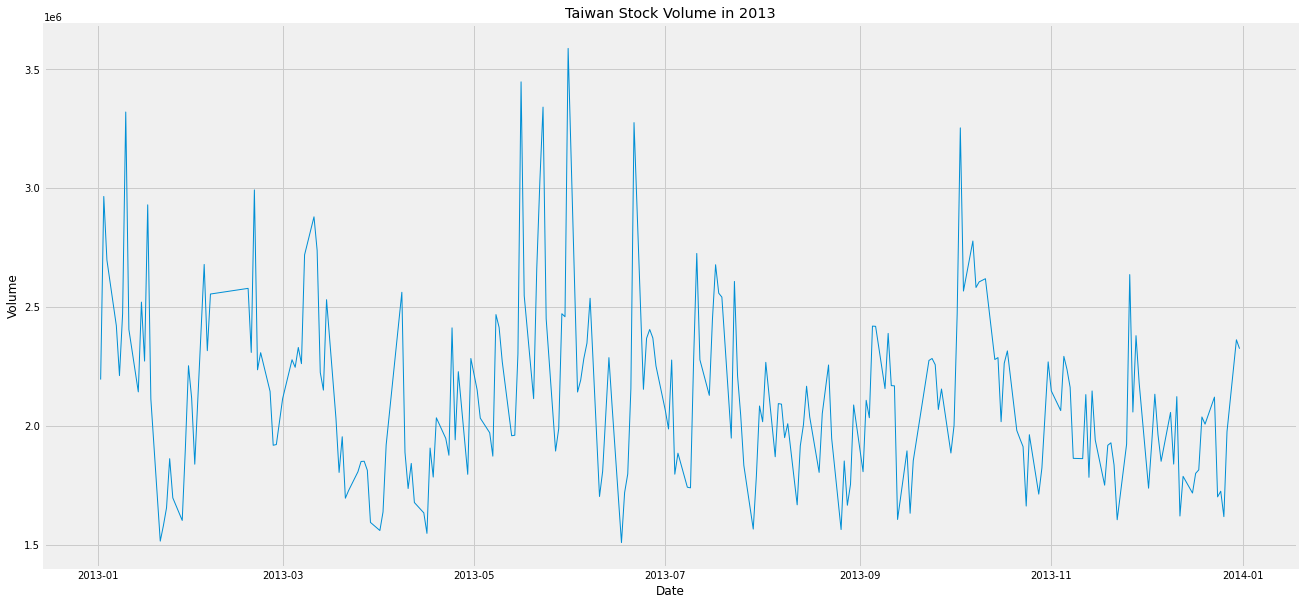

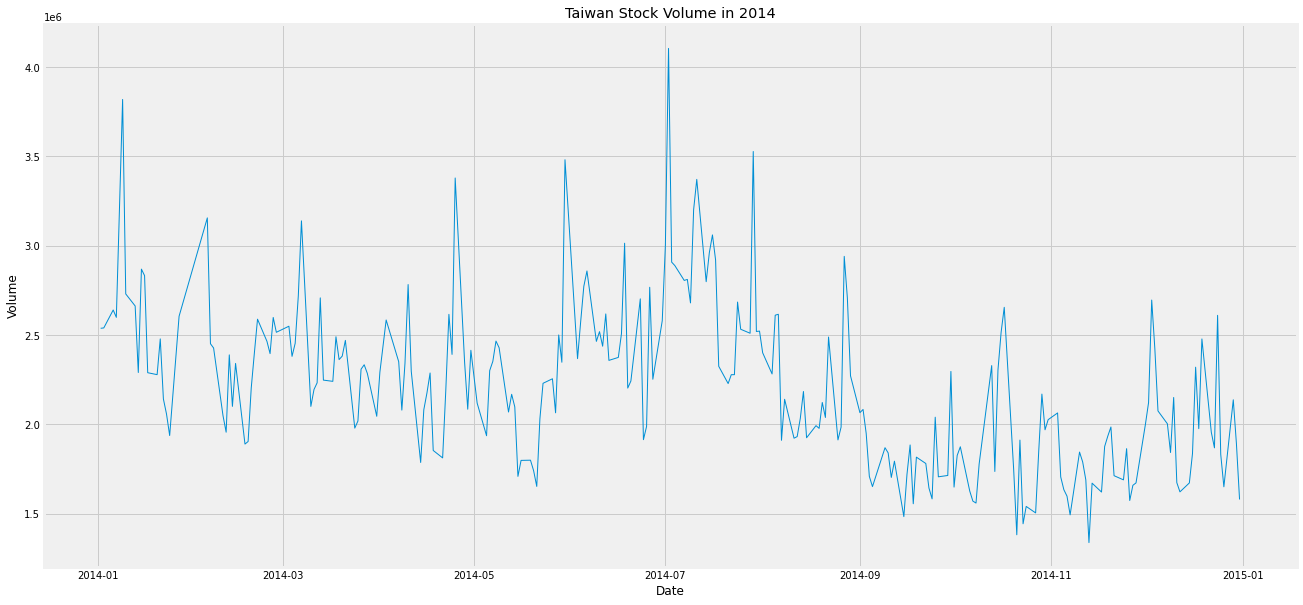

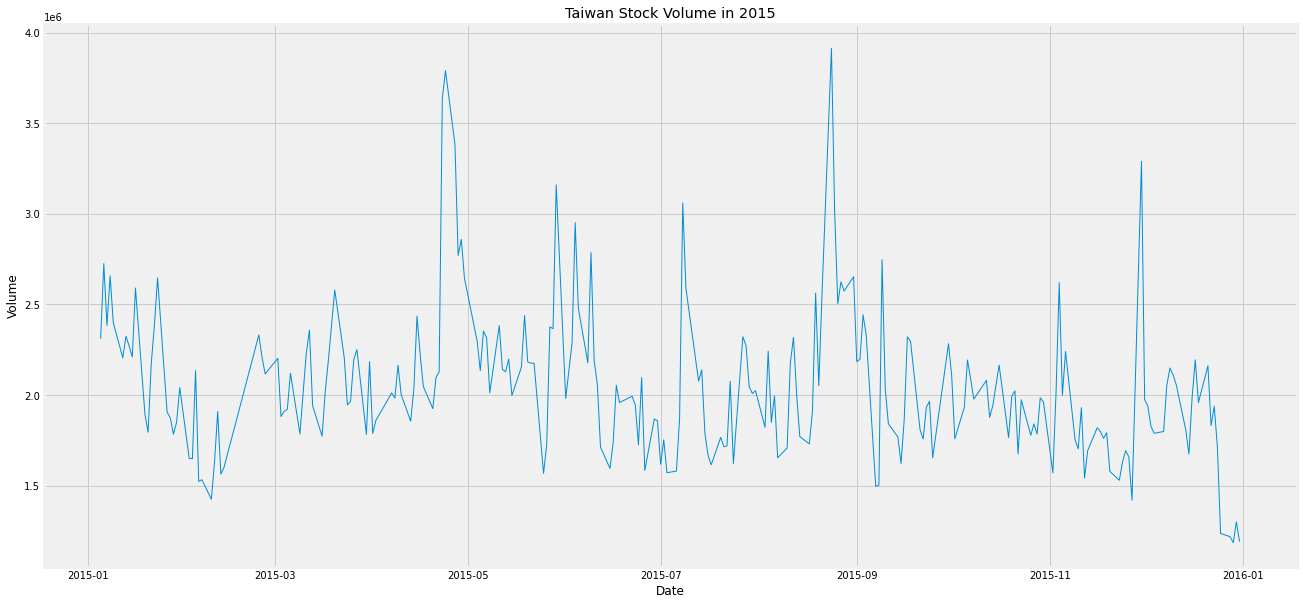

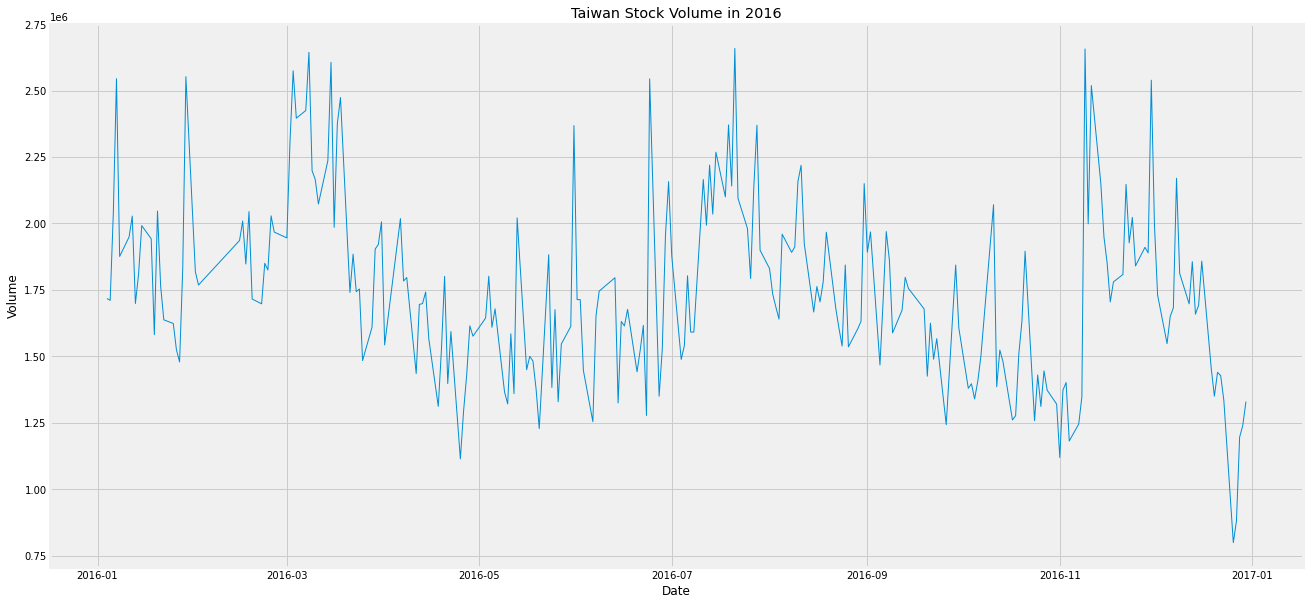

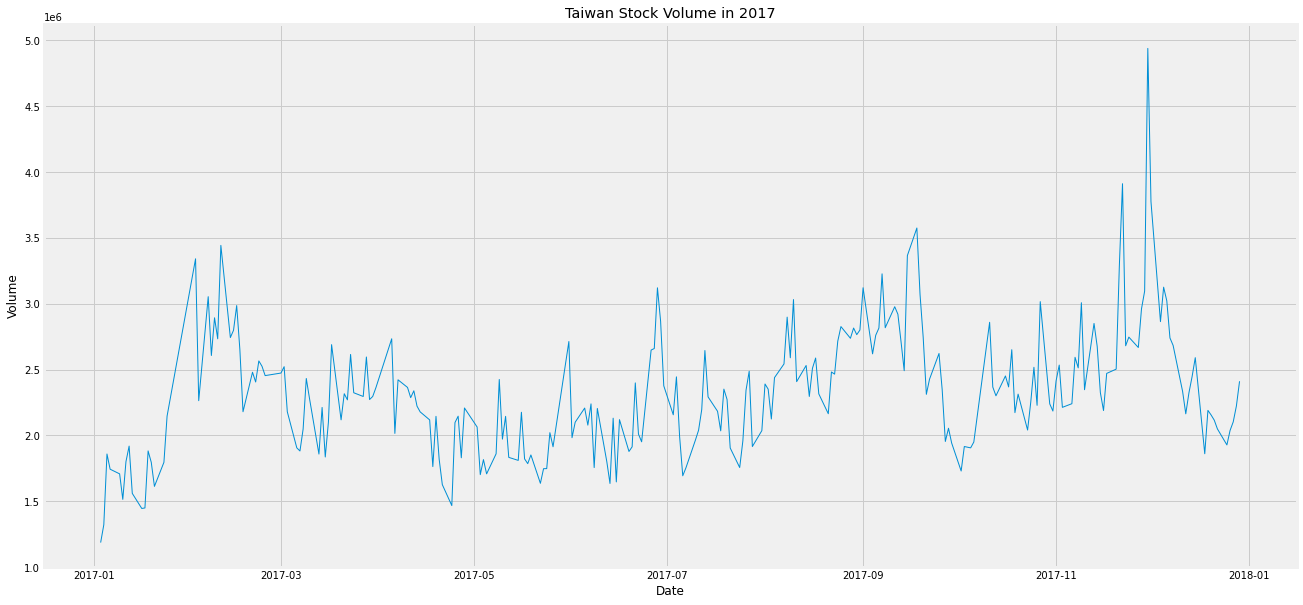

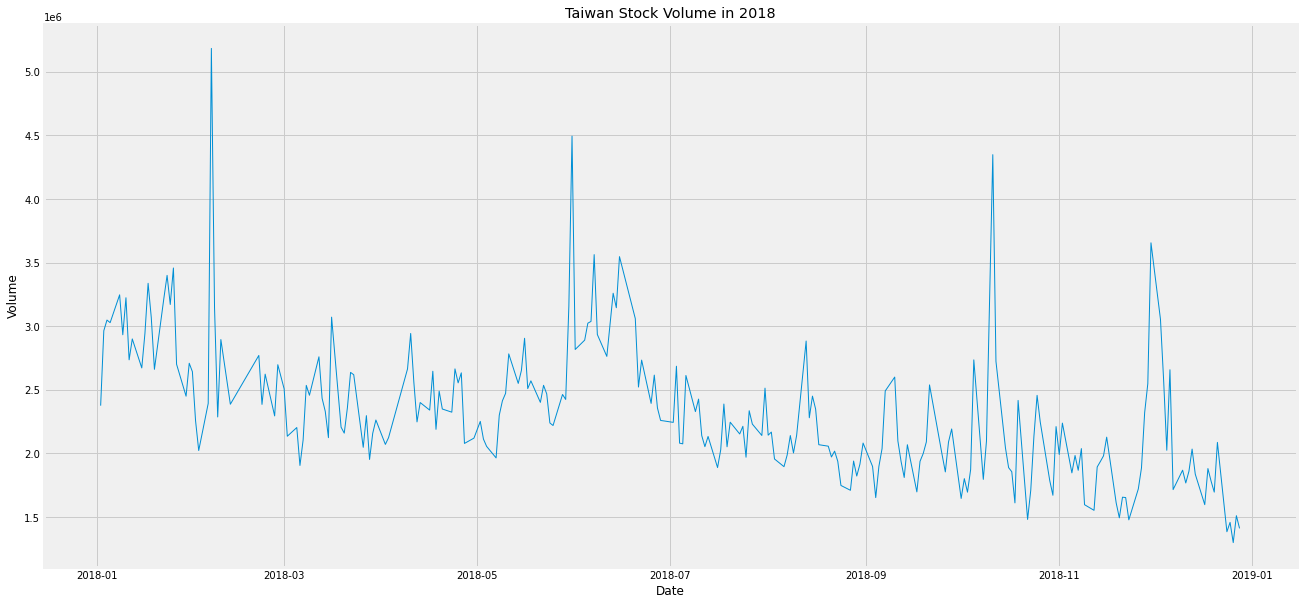

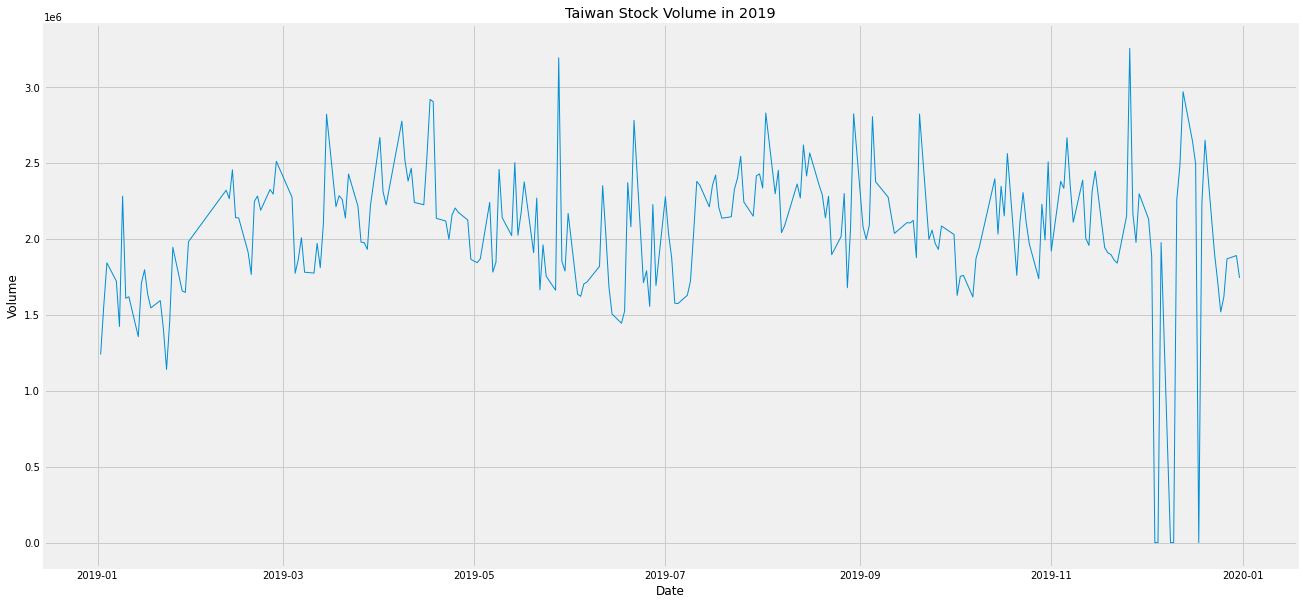

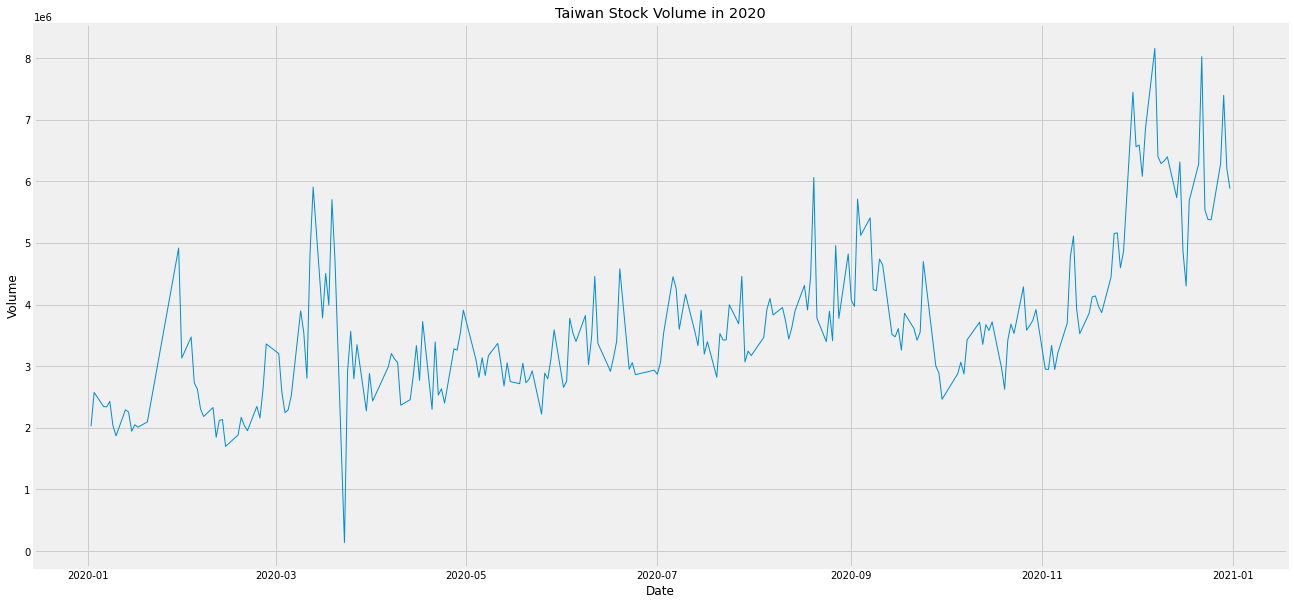

In [19]:
# Make a For loop and Plot the Data
for year in range(2002,2020+1):
    plt.figure(figsize=(20,10))
    sns.lineplot(data=volume.loc[f'{year}-01-01':f'{year}-12-31'],
                 linewidth=1)
    plt.title(f'Taiwan Stock Volume in {year}')
    plt.show()
    print('\n')

## **Conclusion**

From the visualization above, it can be concluded that the stock that occurred at the end of the month decreased

# **Overall Analysis Taiwan Weight Stock Index**

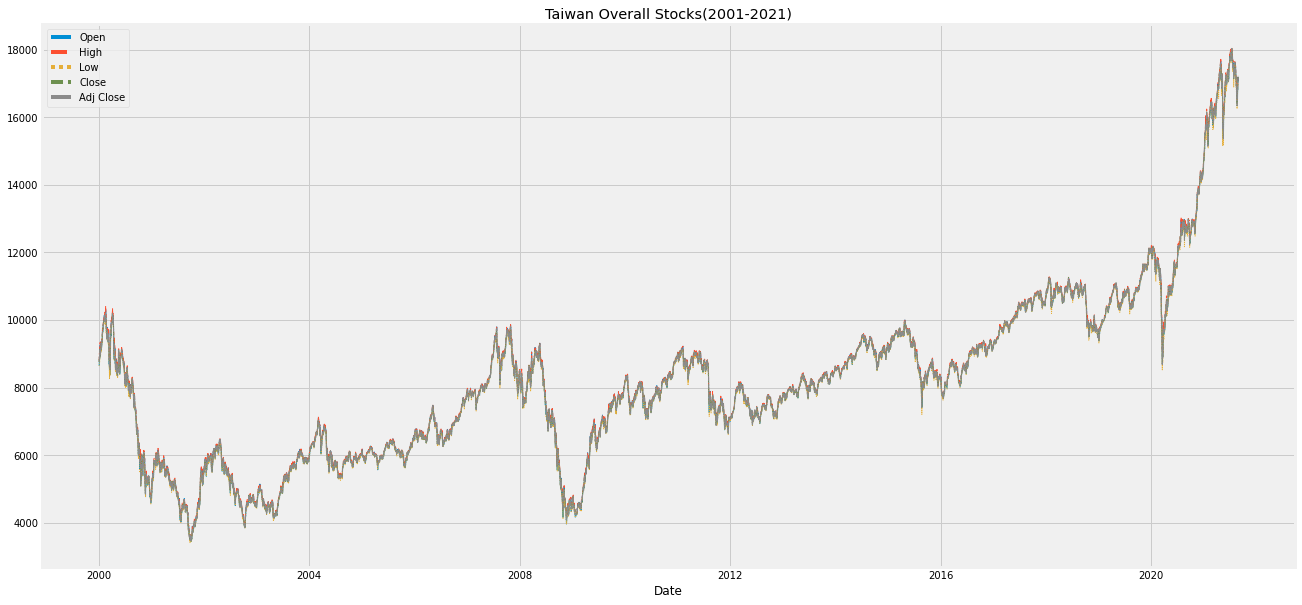

In [21]:
# Plotting Data
plt.figure(figsize=(20,10))
sns.lineplot(data=data,linewidth=1)
plt.title(f'Taiwan Overall Stocks(2001-2021)')
plt.show()

### We can see the ups and downs of the stock in the overall data, where there was a significant increase in stock in early 2020 until now, and there was a decline in stock in the early 2000 and 2008

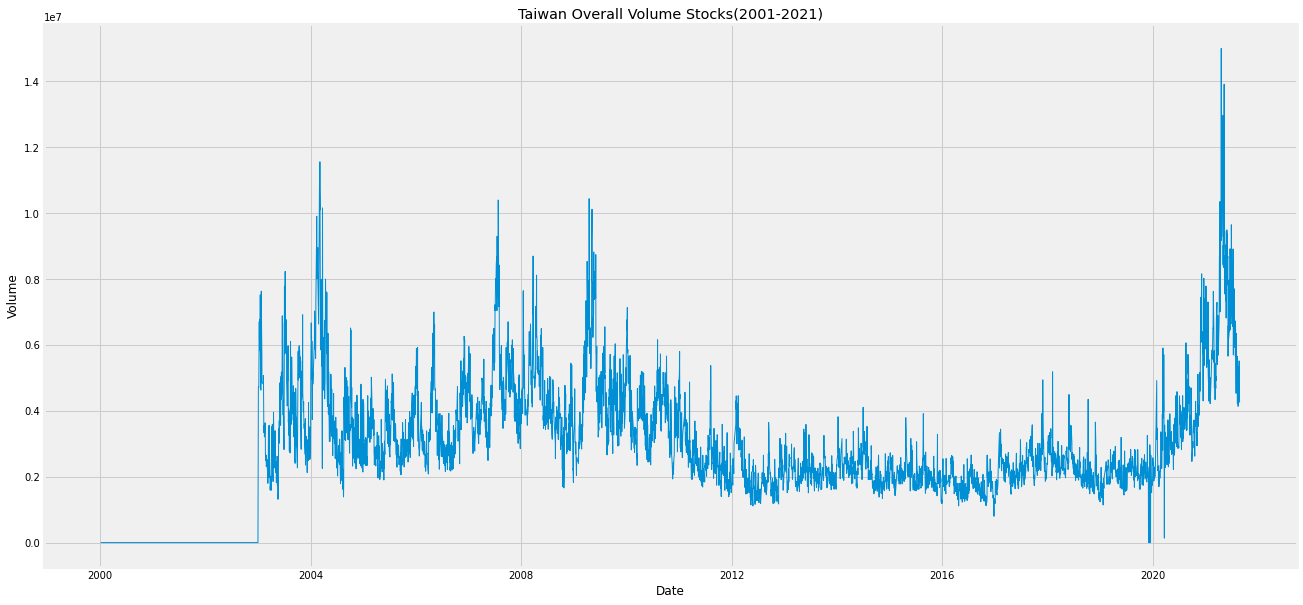

In [22]:
# Plotting Data
plt.figure(figsize=(20,10))
sns.lineplot(data=volume,linewidth=1)
plt.title(f'Taiwan Overall Volume Stocks(2001-2021)')
plt.show()

### We can see the ups and downs of the stock in the overall data, where there was a significant increase in stock in early 2020, and there was a decline in stock in the early 2000, 2008, now.

# **Time Series Analysis on Open, Closing, and Volume Stock**

In [44]:
# Accomodate Data
open_stock = df[['Open']]
close_stock = df[['Close']]
volume_stock = df[['Volume']]

In [11]:
# Make A Plot Function
def plot_timeseries(tdf,label1,label2,col,title):
    plt.figure(figsize=(25,15))
    sns.lineplot(data=tdf,
                 label=label1,
                 legend=False,)
    sns.lineplot(data=df[col],
                 label=label2,
                 legend=False,)
    plt.title(title)
    plt.legend()
    plt.show()

# **Simple Moving Average**

A simple moving average (SMA) is an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average.

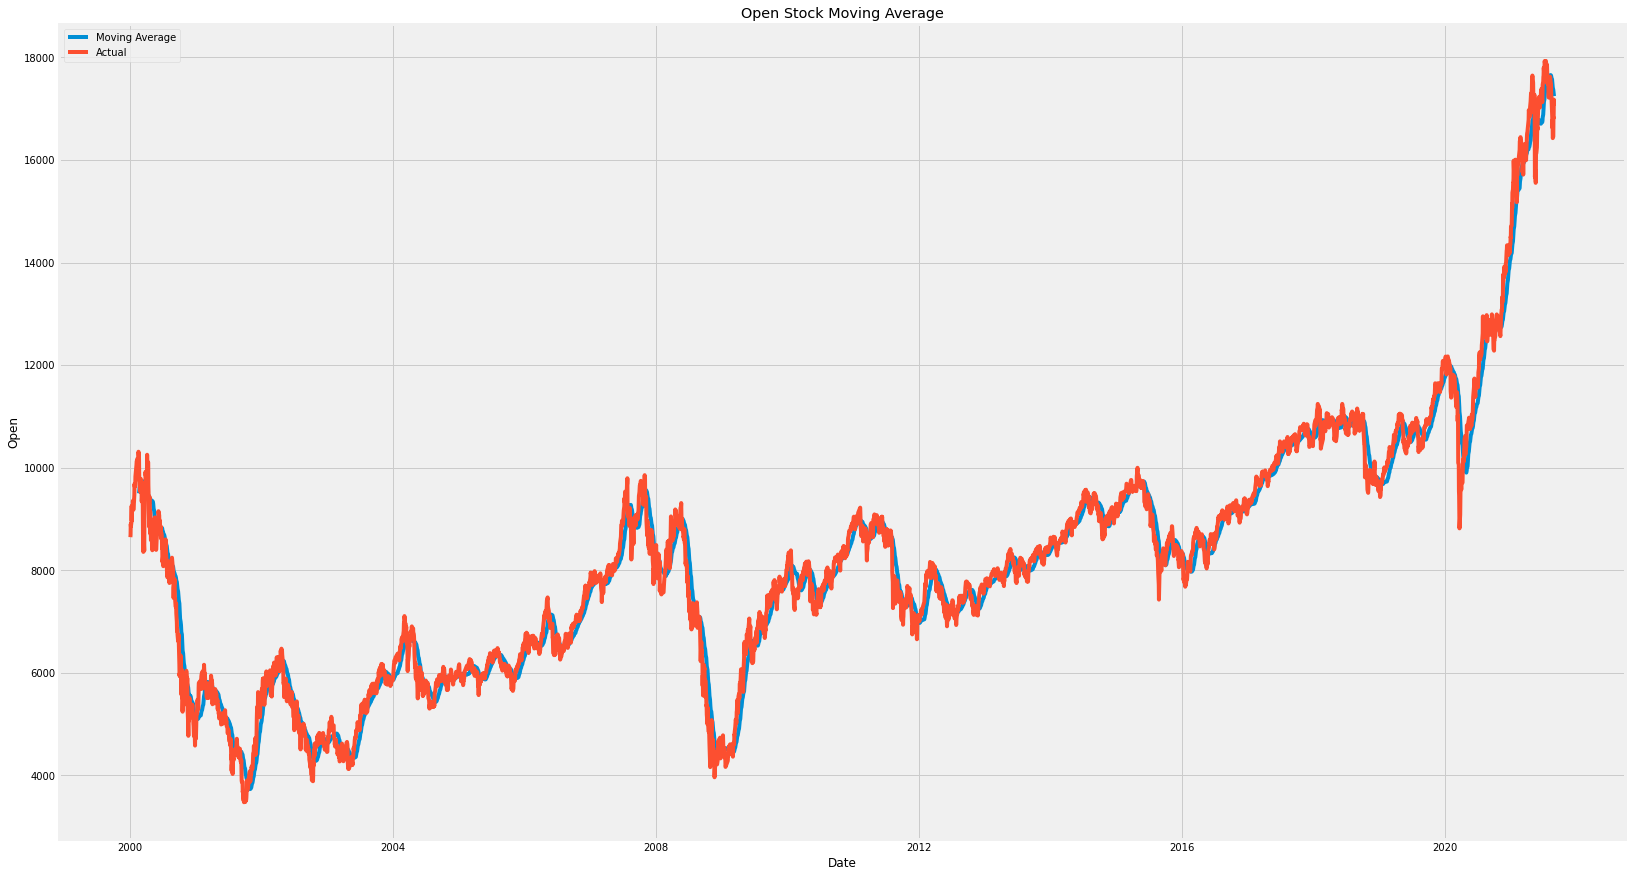

In [41]:
# Prepare Data
simple_moving_average_open_stock = open_stock.rolling(window=30).mean()

# Plotting Data
plot_timeseries(simple_moving_average_open_stock,
                'Moving Average',
                'Actual'
                'Open',
                'Open Stock Moving Average')

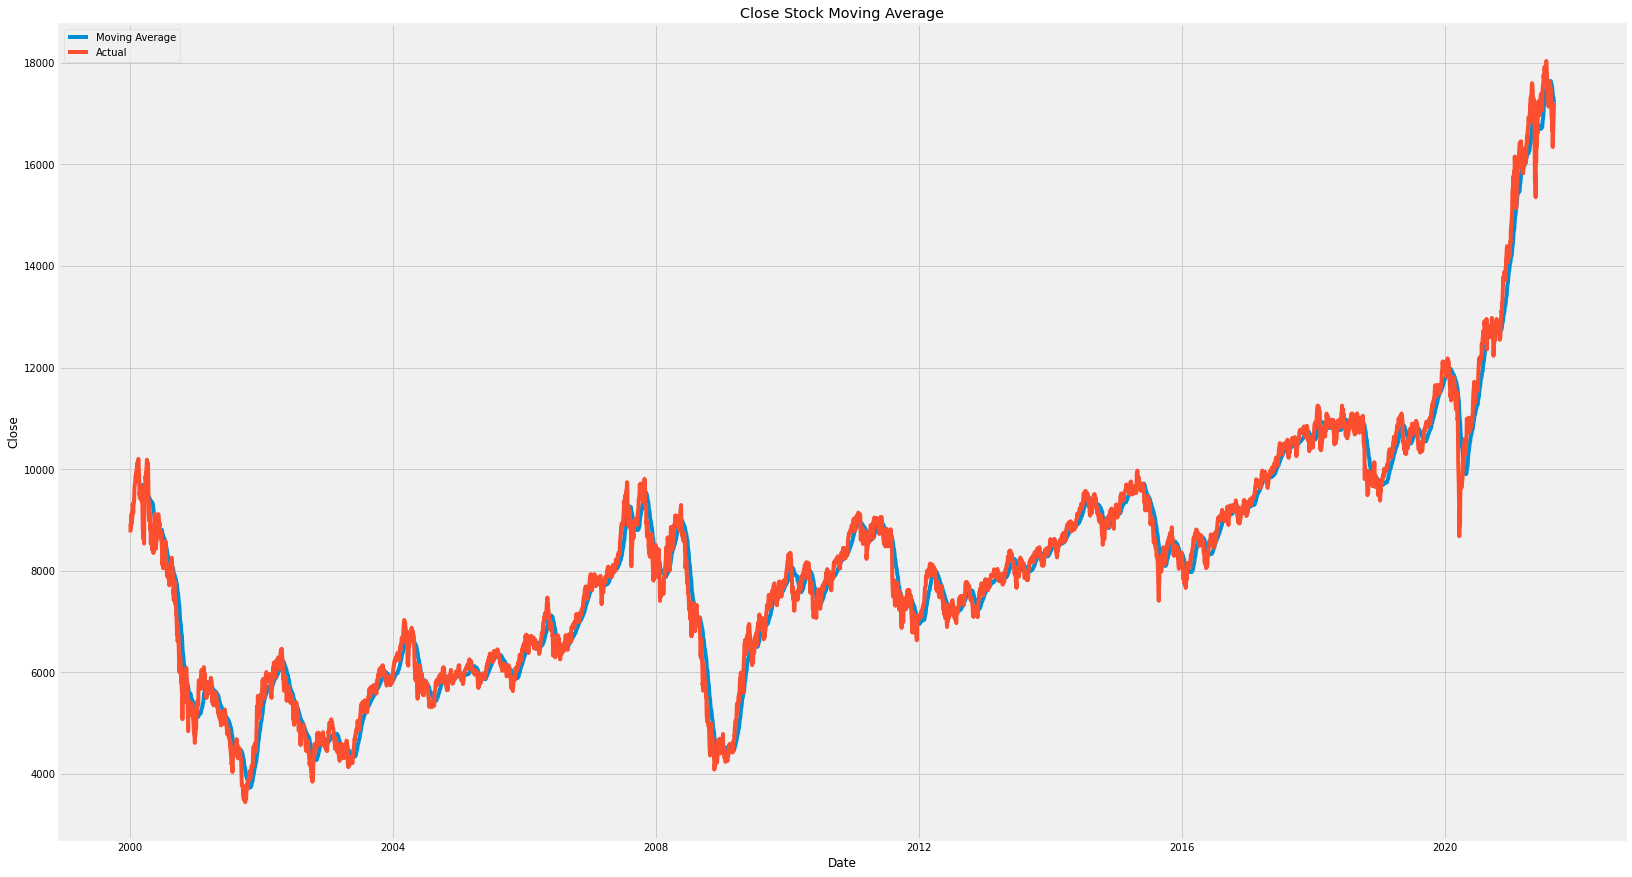

In [42]:
# Prepare Data
simple_moving_average_close_stock = close_stock.rolling(window=30).mean()

# Plotting Data
plot_timeseries(simple_moving_average_close_stock, 
                'Moving Average',
                'Actual',
                'Close',
                'Close Stock Moving Average')

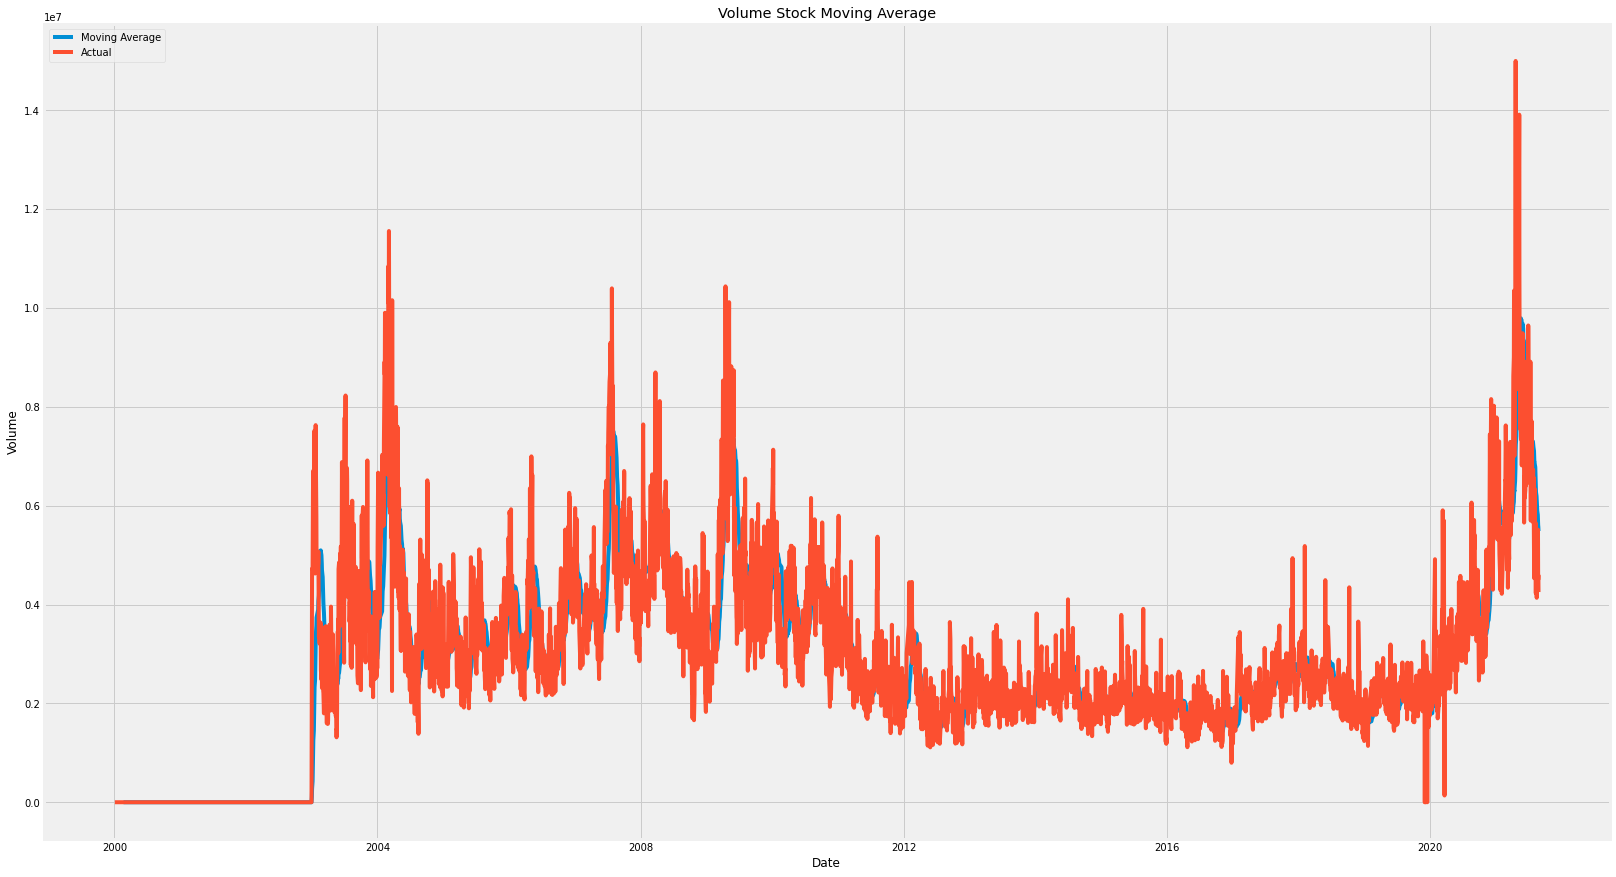

In [43]:
# Prepare Data
simple_moving_average_volume_stock = volume_stock.rolling(window=30).mean()

# Plotting Data
plot_timeseries(simple_moving_average_volume_stock,
                'Moving Average',
                'Actual',
                'Volume',
                'Volume Stock Moving Average')

# **Weighted Moving Average**

A Weighted Moving Average puts more weight on recent data and less on past data. This is done by multiplying each bar's price by a weighting factor. Because of its unique calculation, WMA will follow prices more closely than a corresponding Simple Moving Average.

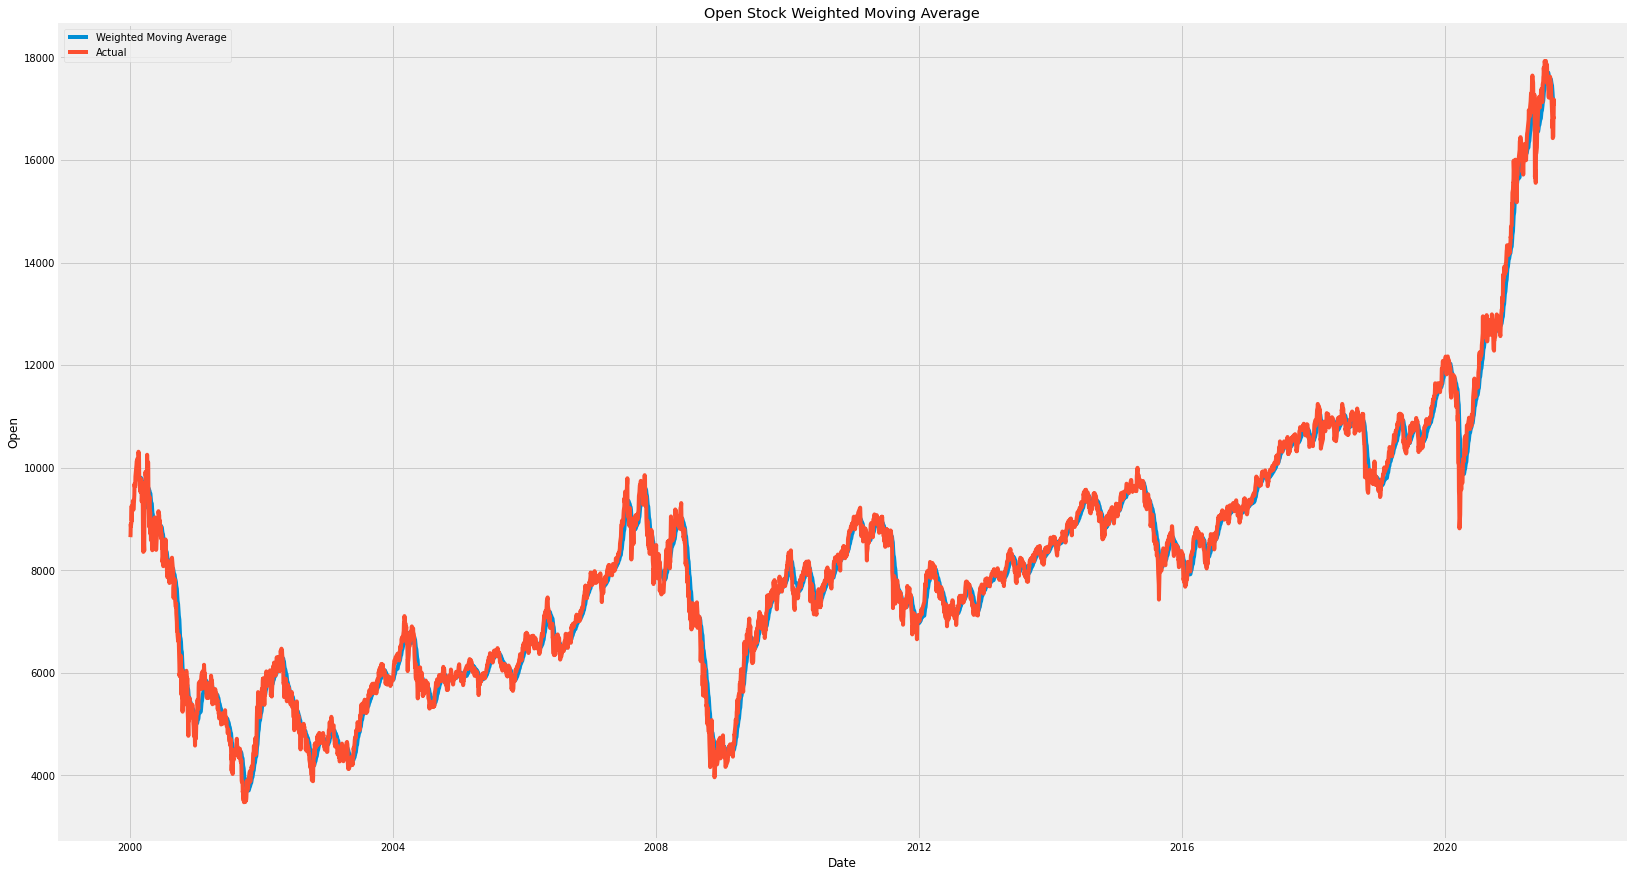

In [50]:
# Prepare Data
weights = np.arange(1,31)
open_MV = df['Open'].rolling(30).apply(lambda close: np.dot(close, weights)/weights.sum(), 
                                      raw=True)

# Plotting Data
plot_timeseries(open_MV,
                'Weighted Moving Average',
                'Actual',
                'Open',
                'Open Stock Weighted Moving Average')

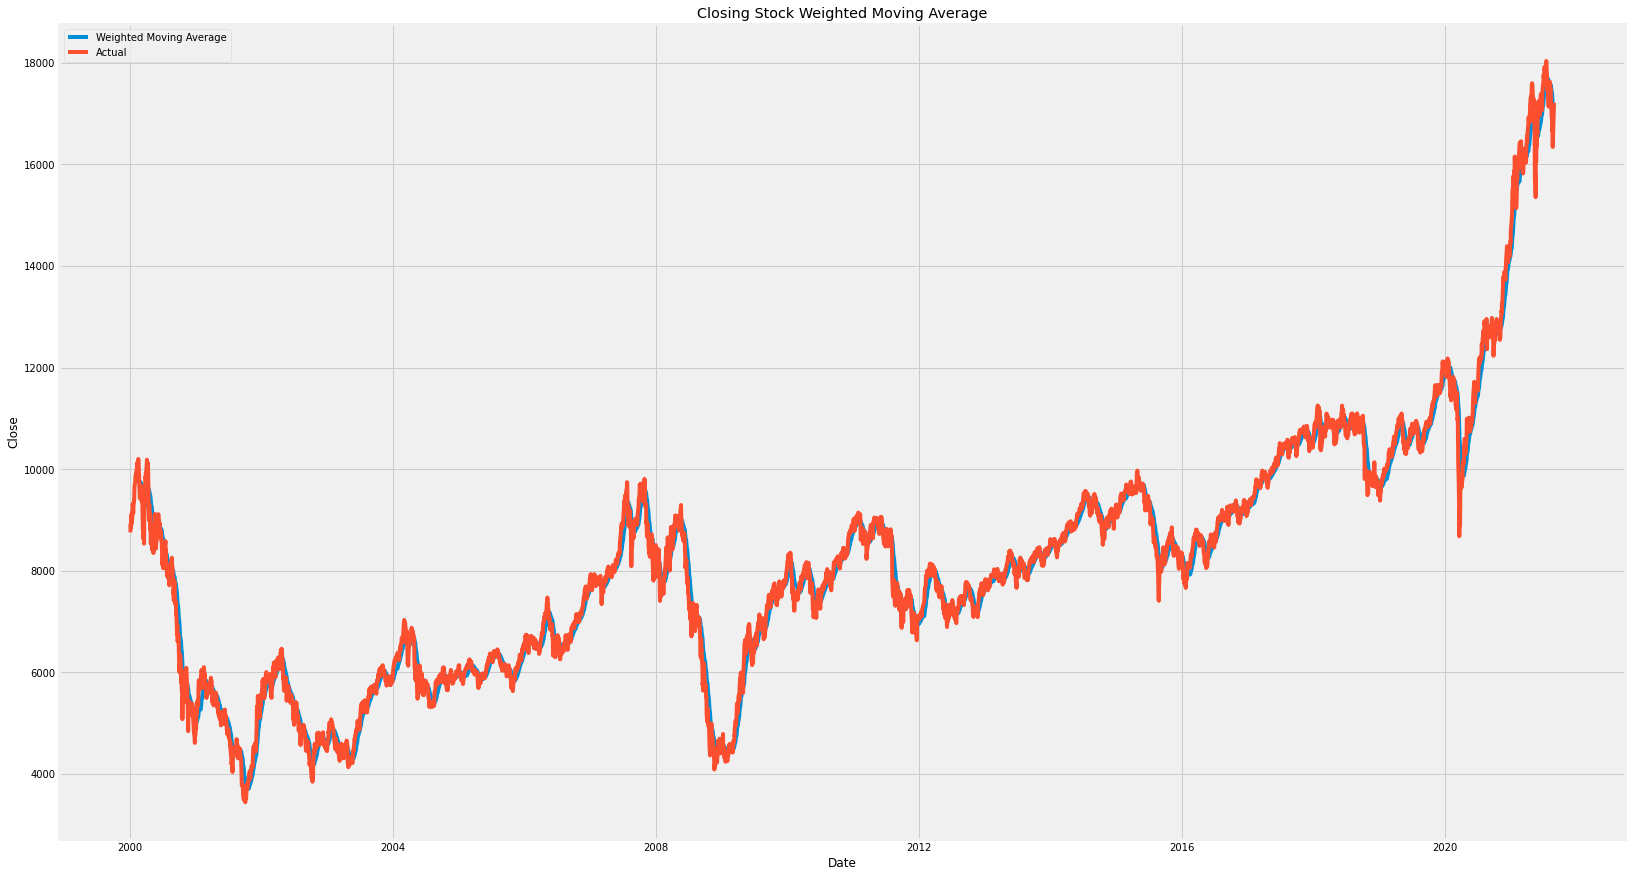

In [12]:
# Prepare Data
weights = np.arange(1,31)
close_MV = df['Close'].rolling(30).apply(lambda close: np.dot(close, weights)/weights.sum(), 
                                        raw=True)

# Plotting Data
plot_timeseries(close_MV,
                'Weighted Moving Average',
                'Actual',
                'Close',
                'Closing Stock Weighted Moving Average')

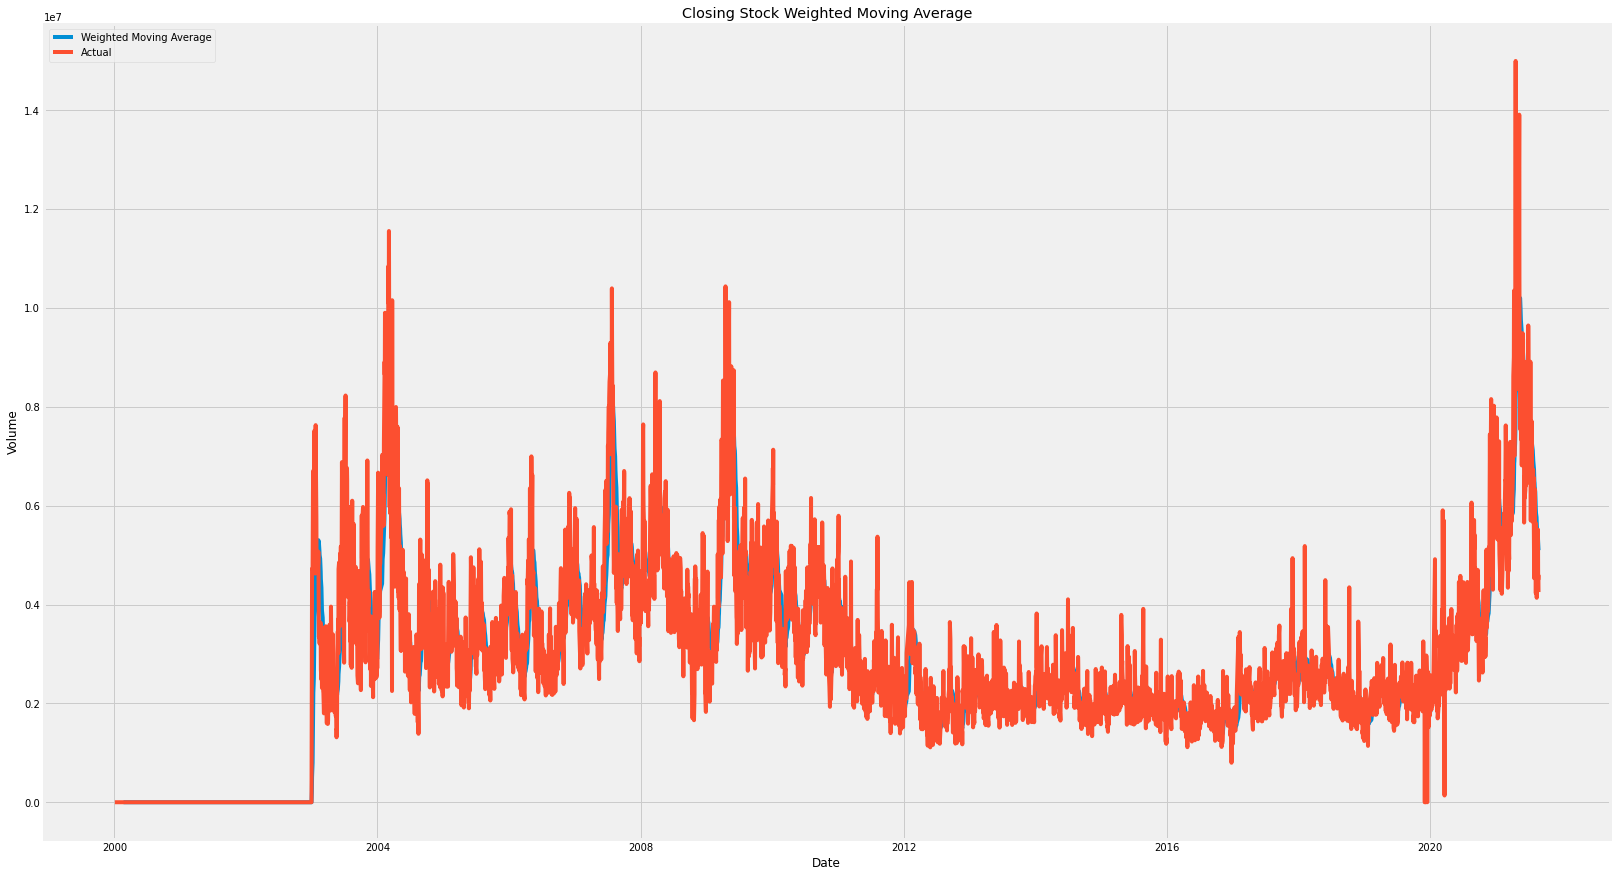

In [47]:
# Prepare Data
weights = np.arange(1,31)
volume_MV = df['Volume'].rolling(30).apply(lambda close: np.dot(close, weights)/weights.sum(), 
                                          raw=True)

# Plotting Data
plot_timeseries(volume_MV,
                'Weighted Moving Average',
                'Actual',
                'Volume',
                'Closing Stock Weighted Moving Average')

# **Exponential Moving Average**

The exponential moving average (EMA) is a technical chart indicator that tracks the price of an investment (like a stock or commodity) over time. The EMA is a type of weighted moving average (WMA) that gives more weighting or importance to recent price data.

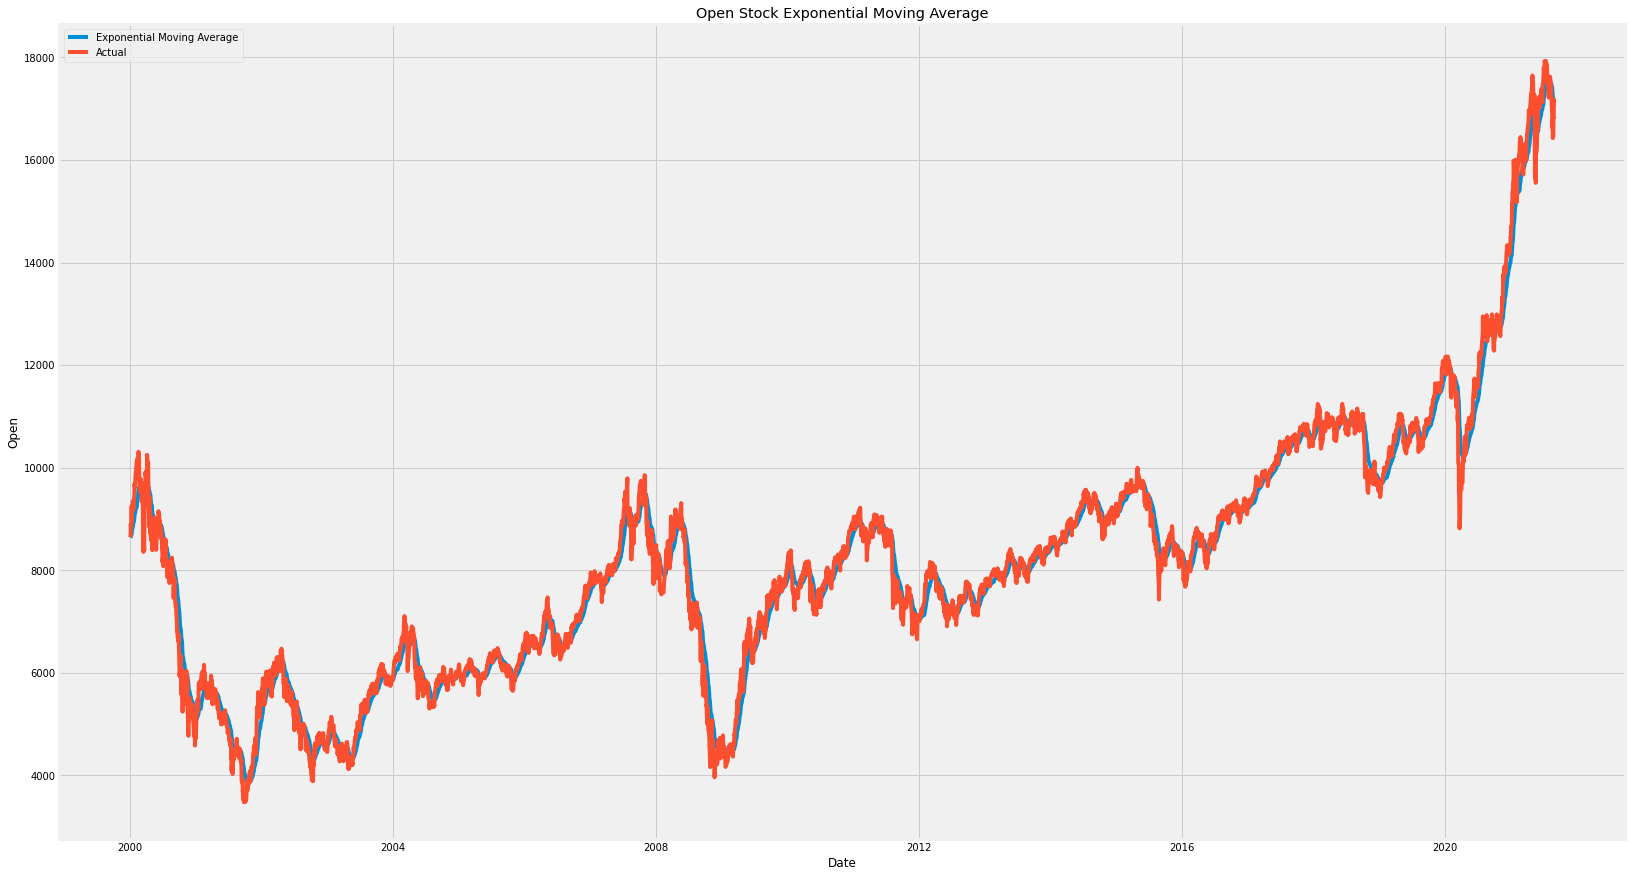

In [51]:
# Prepare Data
expo_mv_open = df['Open'].ewm(span=30, 
                              adjust=False).mean()

# Plotting Data
plot_timeseries(expo_mv_open,
                'Exponential Moving Average',
                'Actual',
                'Open',
                'Open Stock Exponential Moving Average')

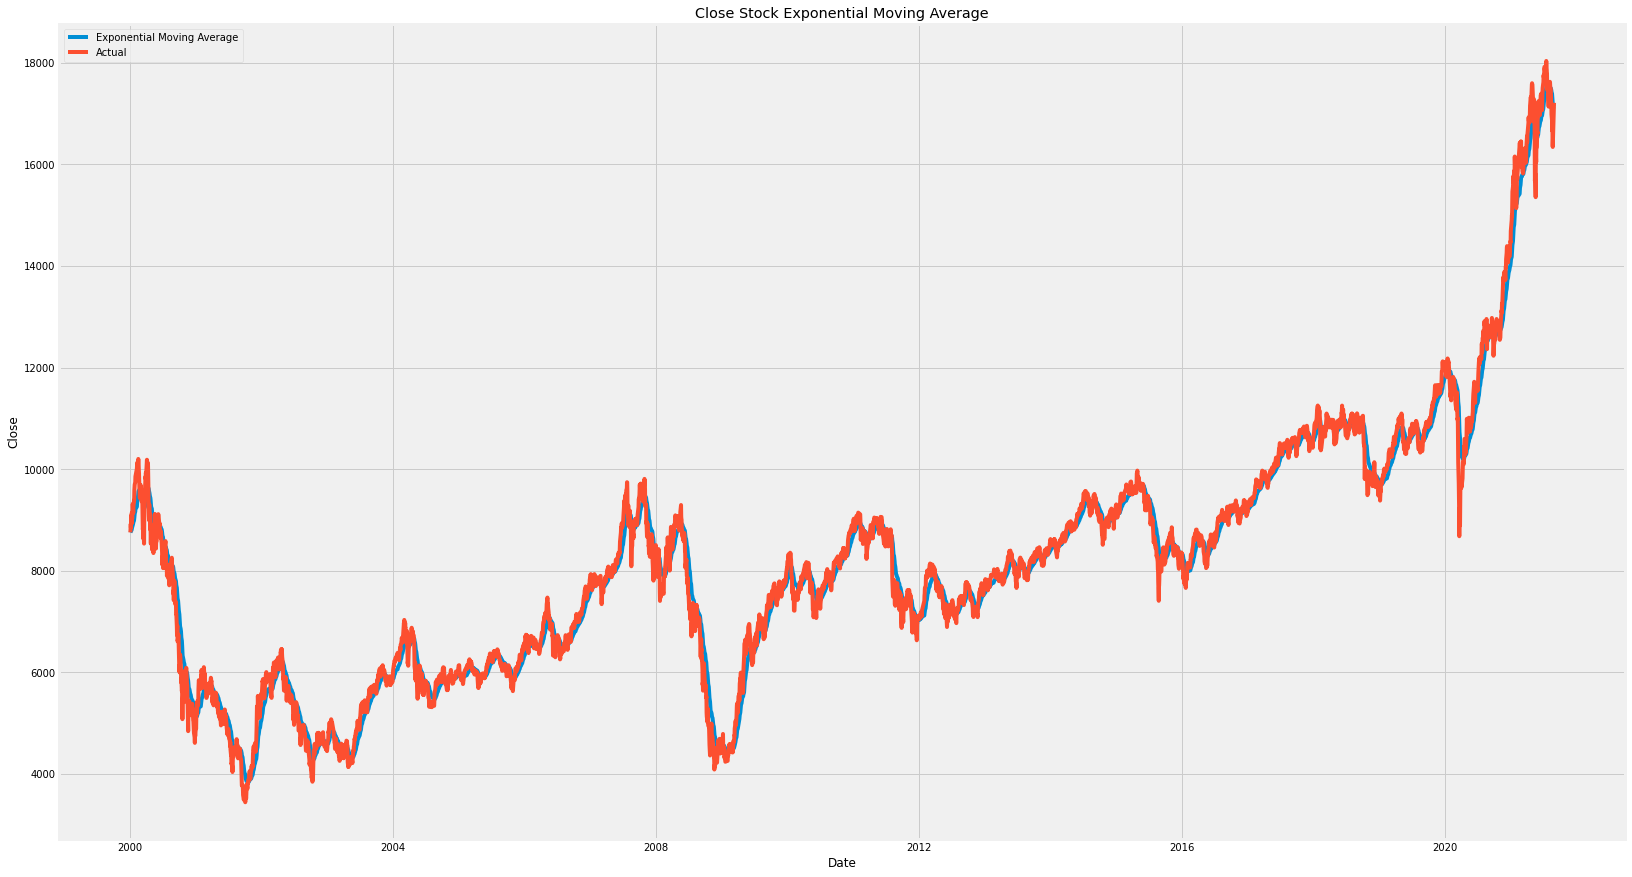

In [52]:
# Prepare Data
expo_mv_close = df['Close'].ewm(span=30, 
                                adjust=False).mean()

# Plotting Data
plot_timeseries(expo_mv_close,
                'Exponential Moving Average',
                'Actual',
                'Close',
                'Close Stock Exponential Moving Average')

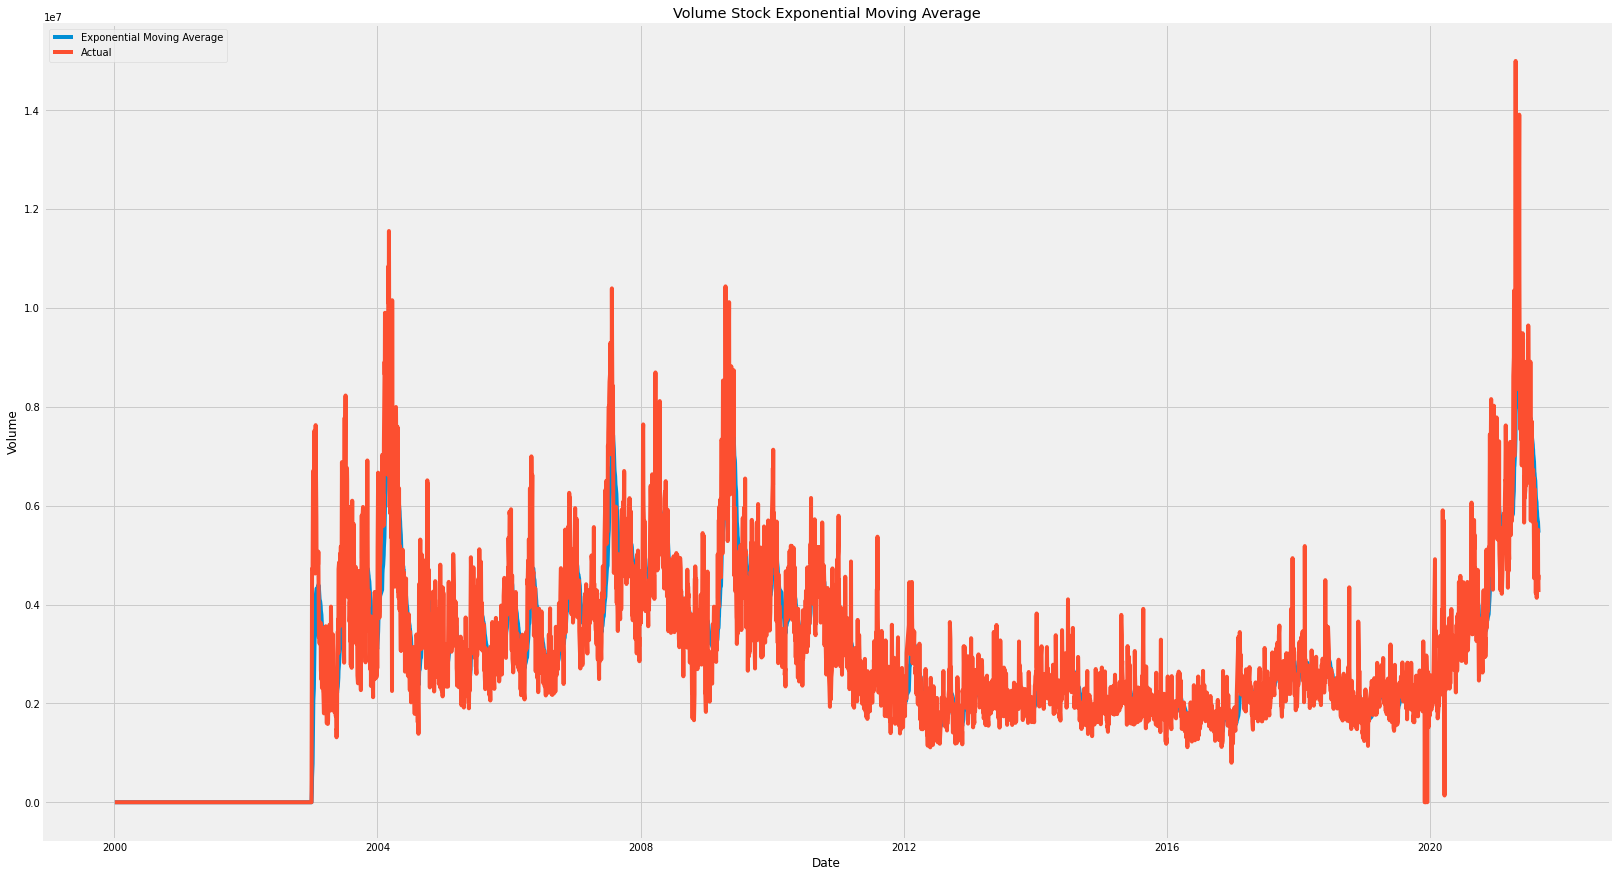

In [53]:
# Prepare Data
expo_mv_volume = df['Volume'].ewm(span=30, 
                                  adjust=False).mean()

# Plotting Data
plot_timeseries(expo_mv_volume,
                'Exponential Moving Average',
                'Actual',
                'Volume',
                'Volume Stock Exponential Moving Average')

# **And that's it! Don't Forget to gice me a feedback and upvote if you like it!**